# **Modelo de Crédito - Regressão Logística - Versão 18**

<br>

In [ ]:
# Montando o drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<br>

## **Bibliotecas necessárias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score

<br>

## **Exploração dos Dados (Entendimento dos Dados).**

In [ ]:
# Leitura da ABT 'applicatiion_train'.
abt_00 = pd.read_csv('/content/drive/MyDrive/CREDIT_SCORING_SQUAD8/1_ABT/notebooks/fe_application_01.csv', index_col=0)
abt_00.shape

(215257, 183)

In [ ]:
abt_00.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,APP_ANNUITY_INCOME_RATIO,APP_AGE,APP_CHILDREN_INCOME_RATIO,EXT_SOURCE_MEAN,APP_EMPLOYED_LENGTH,APP_GOODS_CREDIT_RATIO,APP_CREDIT_DOWN_PAYMENT,APP_NEW_DAYS_EMPLOYED_PERC,APP_NEW_INCOME_PER_PERSON,APP_NEW_PAYMENT_RATE
0,247330,0,Cash loans,F,N,N,0,157500.0,706410.0,67072.5,...,0.425857,40,0.000000,NaN,5,0.961906,-26910.0,0.140722,78750.0,0.094948
1,425716,1,Cash loans,F,Y,Y,1,121500.0,545040.0,25407.0,...,0.209111,38,0.000008,0.640828,6,0.825627,-95040.0,0.160486,40500.0,0.046615
2,331625,0,Cash loans,M,Y,Y,1,225000.0,942300.0,27679.5,...,0.123020,59,0.000004,NaN,3,0.716332,-267300.0,0.061558,75000.0,0.029374
3,455397,0,Revolving loans,F,N,Y,2,144000.0,180000.0,9000.0,...,0.062500,35,0.000014,NaN,6,1.000000,0.0,0.175350,48000.0,0.050000
4,449114,0,Cash loans,F,N,Y,0,112500.0,729792.0,37390.5,...,0.332360,53,0.000000,0.448250,-1000,0.863260,-99792.0,-18.572308,56250.0,0.051234


In [ ]:
abt_00.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,APP_ANNUITY_INCOME_RATIO,APP_AGE,APP_CHILDREN_INCOME_RATIO,EXT_SOURCE_MEAN,APP_EMPLOYED_LENGTH,APP_GOODS_CREDIT_RATIO,APP_CREDIT_DOWN_PAYMENT,APP_NEW_DAYS_EMPLOYED_PERC,APP_NEW_INCOME_PER_PERSON,APP_NEW_PAYMENT_RATE
count,215257.000000,215257.000000,215257.000000,2.152570e+05,2.152570e+05,215249.000000,2.150580e+05,215257.000000,215257.000000,215257.000000,...,215249.000000,215257.000000,215257.000000,76771.000000,215257.000000,215058.000000,215058.000000,215257.000000,2.152560e+05,215249.000000
mean,278236.387137,0.080889,0.416637,1.685568e+05,5.994960e+05,27119.681762,5.388269e+05,0.020869,-16033.152241,63737.365791,...,0.180900,43.425097,0.000003,0.511483,-174.908756,0.900753,-60967.922363,-2.917539,9.298872e+04,0.053683
std,102885.029589,0.272666,0.719695,1.058557e+05,4.028989e+05,14522.021876,3.698161e+05,0.013829,4361.858115,141210.765298,...,0.094592,11.948960,0.000006,0.130978,386.433361,0.097775,70710.516579,6.625588,7.378751e+04,0.022478
min,100003.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.005444,20.000000,0.000000,0.023705,-1000.000000,0.166667,-540000.000000,-47.384925,2.812500e+03,0.022073
25%,189025.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16506.000000,2.385000e+05,0.010006,-19681.000000,-2760.000000,...,0.114745,34.000000,0.000000,0.423457,0.000000,0.834725,-100363.500000,0.021502,4.725000e+04,0.036900
50%,278215.000000,0.000000,0.000000,1.440000e+05,5.148675e+05,24903.000000,4.500000e+05,0.018850,-15749.000000,-1214.000000,...,0.162820,43.000000,0.000000,0.519965,3.000000,0.893815,-39204.000000,0.088612,7.500000e+04,0.050000
75%,367388.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34650.000000,6.795000e+05,0.028663,-12410.000000,-290.000000,...,0.228872,53.000000,0.000004,0.608077,7.000000,1.000000,0.000000,0.190979,1.125000e+05,0.064055
max,456255.000000,1.000000,19.000000,1.350000e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.451571,69.000000,0.000311,0.853417,49.000000,6.666667,765000.000000,0.728811,6.750000e+06,0.124430


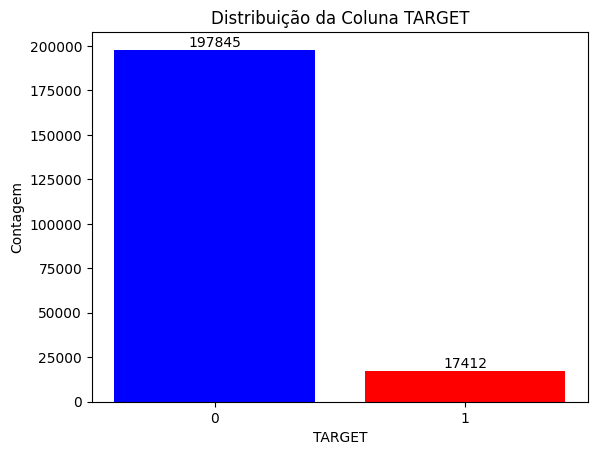

In [ ]:
# Plotando gráfico de colunas para ver a distribuição do Target.
count_targets = abt_00['TARGET'].value_counts()

plt.bar(count_targets.index, count_targets.values, color=['blue', 'red'])
plt.xlabel('TARGET')
plt.ylabel('Contagem')
plt.title('Distribuição da Coluna TARGET')

for index, value in enumerate(count_targets.values):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.xticks(count_targets.index, ['0', '1'])

plt.show()

<br>

## **Validação Cruzada tipo Holdout utilizando modo Out-of-Sample.**

- Como a PoD Bank é relativamente nova e ainda não temos dados históricos suficientes, optamos aqui pela abordagem Out-of-Sample 70/30 e não por safras. Serão 70% dos dados para treino e 30% para teste.

In [ ]:
# Dividindo os dados em conjunto de treinamento e teste (70% treino, 30% teste).
abt_treino_00, abt_teste_00 = train_test_split(abt_00, test_size=0.3, random_state=42)
abt_treino_00.shape, abt_teste_00.shape

((150679, 183), (64578, 183))

In [ ]:
abt_treino_00.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,APP_ANNUITY_INCOME_RATIO,APP_AGE,APP_CHILDREN_INCOME_RATIO,EXT_SOURCE_MEAN,APP_EMPLOYED_LENGTH,APP_GOODS_CREDIT_RATIO,APP_CREDIT_DOWN_PAYMENT,APP_NEW_DAYS_EMPLOYED_PERC,APP_NEW_INCOME_PER_PERSON,APP_NEW_PAYMENT_RATE
45499,102669,0,Cash loans,F,N,Y,0,157500.0,709033.5,39721.5,...,0.252200,32,0.000000,NaN,3,0.926613,-52033.5,0.122358,157500.0,0.056022
74186,202196,1,Cash loans,F,N,Y,1,189000.0,640080.0,31261.5,...,0.165405,34,0.000005,0.408192,0,0.703037,-190080.0,0.012688,63000.0,0.048840
65253,272854,0,Cash loans,F,N,N,1,121500.0,104256.0,8194.5,...,0.067444,27,0.000008,0.381227,1,0.863260,-14256.0,0.039761,60750.0,0.078600
60400,207628,0,Cash loans,F,N,N,0,112500.0,755190.0,36328.5,...,0.322920,25,0.000000,NaN,2,0.893815,-80190.0,0.095094,56250.0,0.048105
71140,244369,1,Cash loans,F,N,N,1,193500.0,521280.0,25209.0,...,0.130279,41,0.000005,0.398908,6,0.863260,-71280.0,0.144464,96750.0,0.048360


<br>

## **Preparação dos Dados**

### **Visualização dos Metadados**

In [ ]:
# Função para verificar os metadados da ABT.
def pod_academy_generate_metadata(df, ids, targets, orderby = 'PC_NULOS'):
    """
    Esta função retorna uma tabela com informações descritivas sobre um DataFrame.

    Parâmetros:
    - df: DataFrame que você quer descrever.
    - ids: Lista de colunas que são identificadores.
    - targets: Lista de colunas que são variáveis alvo.

    Retorna:
    Um DataFrame com informações sobre o df original.
    """

    summary = pd.DataFrame({
        'USO_FEATURE': ['ID' if col in ids else 'Target' if col in targets else 'Explicativa' for col in df.columns],
        'QT_NULOS': df.isnull().sum(),
        'PC_NULOS': round((df.isnull().sum() / len(df))* 100,2),
        'CARDINALIDADE': df.nunique(),
        'TIPO_FEATURE': df.dtypes
    })

    summary_sorted = summary.sort_values(by=orderby, ascending=False)
    summary_sorted = summary_sorted.reset_index()

    # Renomeando a coluna 'index' para 'FEATURES'.
    summary_sorted = summary_sorted.rename(columns={'index': 'FEATURE'})

    return summary_sorted

In [ ]:
metadados = pod_academy_generate_metadata(abt_treino_00,
                                          ids=['SK_ID_CURR'],
                                          targets=['TARGET'],
                                          orderby = 'PC_NULOS')

metadados

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,COMMONAREA_MEDI,Explicativa,105323,69.90,2741,float64
1,COMMONAREA_MODE,Explicativa,105323,69.90,2681,float64
2,COMMONAREA_AVG,Explicativa,105323,69.90,2721,float64
3,NONLIVINGAPARTMENTS_AVG,Explicativa,104662,69.46,321,float64
4,NONLIVINGAPARTMENTS_MODE,Explicativa,104662,69.46,140,float64
...,...,...,...,...,...,...
178,LIVE_CITY_NOT_WORK_CITY,Explicativa,0,0.00,2,int64
179,REG_CITY_NOT_WORK_CITY,Explicativa,0,0.00,2,int64
180,REG_CITY_NOT_LIVE_CITY,Explicativa,0,0.00,2,int64
181,LIVE_REGION_NOT_WORK_REGION,Explicativa,0,0.00,2,int64


### **Tratamento dos Valores Nulos (missings)**

- Não iremos dropar nenhuma coluna, pois não há nenhuma coluna com mais de 80% de valores nulos.

- Vamos fazer a imputação da média em todas as colunas numéricas com valores nulos e para as categóricas vamos substituir por "POD_VERIFICAR".

In [ ]:
# Determinando o limite de valores nulos.
missing_cutoff = 80

# Definindo a variável com valor nulo igual ou acima de 80% e gravando ela em uma lista.
drop_vars_nulos = metadados[(metadados['PC_NULOS'] >= missing_cutoff)]
lista_drop_vars = list(drop_vars_nulos.FEATURE.values)

print('Variáveis que serão excluídas por alto percentual de nulos: ',lista_drop_vars)

# Retirando a lista de variáveis com alto percentual de nulos.
abt_treino_01 = abt_treino_00.drop(axis=1,columns=lista_drop_vars)

abt_treino_01.shape

Variáveis que serão excluídas por alto percentual de nulos:  []


(150679, 183)

In [ ]:
# Salvando a lista de variáveis dropadas em um arquivo .pkl (artefato).
with open('/content/drive/MyDrive/CREDIT_SCORING_SQUAD8/3_modelagem/Modelo_Regressao_Logistica/wagner/v18_fe_application_01/artefatos/prd_drop_nullvars.pkl', 'wb') as f:
    pickle.dump(lista_drop_vars, f)

In [ ]:
# Carregando o pkl com a lista de variáveis a serem removidas.
with open('/content/drive/MyDrive/CREDIT_SCORING_SQUAD8/3_modelagem/Modelo_Regressao_Logistica/wagner/v18_fe_application_01/artefatos/prd_drop_nullvars.pkl', 'rb') as f:
    loaded_pkl_drop_nullvars = pickle.load(f)

# Aplicando a remoção das variáveis na tabela de teste.
abt_teste_01 = abt_teste_00.drop(axis=1, columns=loaded_pkl_drop_nullvars)

abt_teste_01.shape

(64578, 183)

In [ ]:
# Função para preenchimento dos valores nulos.
def pod_custom_fillna(df):
    numerical_cols = df.select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns
    means = {}

    for col in numerical_cols:
        means[col] = df[col].mean()
        df[col].fillna(means[col], inplace=True)

    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna('POD_VERIFICAR')

    return df, means

In [ ]:
# Dropando as colunas de Target e ID.
abt_treino_02 = abt_treino_01.drop(axis=1,columns=['TARGET','SK_ID_CURR'],inplace=False)

# Chamando a função para preenchimento dos valores nulos.
abt_treino_02, means = pod_custom_fillna(abt_treino_02)

# Salvando a substituição de nulos em um arquivo .pkl (artefato).
with open('/content/drive/MyDrive/CREDIT_SCORING_SQUAD8/3_modelagem/Modelo_Regressao_Logistica/wagner/v18_fe_application_01/artefatos/prd_fillna.pkl', 'wb') as f:
  pickle.dump(means, f)

In [ ]:
abt_treino_02.shape

(150679, 181)

In [ ]:
metadados = pod_academy_generate_metadata(abt_treino_02,
                                          ids=['SK_ID_CURR'],
                                          targets=['TARGET'],
                                          orderby = 'PC_NULOS')

metadados

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,NAME_CONTRACT_TYPE,Explicativa,0,0.0,2,object
1,AMT_REQ_CREDIT_BUREAU_HOUR,Explicativa,0,0.0,5,float64
2,AMT_REQ_CREDIT_BUREAU_WEEK,Explicativa,0,0.0,10,float64
3,AMT_REQ_CREDIT_BUREAU_MON,Explicativa,0,0.0,22,float64
4,AMT_REQ_CREDIT_BUREAU_QRT,Explicativa,0,0.0,11,float64
...,...,...,...,...,...,...
176,ENTRANCES_MODE,Explicativa,0,0.0,31,float64
177,FLOORSMAX_MODE,Explicativa,0,0.0,26,float64
178,FLOORSMIN_MODE,Explicativa,0,0.0,26,float64
179,LANDAREA_MODE,Explicativa,0,0.0,3210,float64


### **Aplicar o tratamento de nulos na base de teste (out-of-sample)**

In [ ]:
with open('/content/drive/MyDrive/CREDIT_SCORING_SQUAD8/3_modelagem/Modelo_Regressao_Logistica/wagner/v18_fe_application_01/artefatos/prd_fillna.pkl', 'rb') as f:
  loaded_means = pickle.load(f)
loaded_means

{'CNT_CHILDREN': 0.4162092926021542,
 'AMT_INCOME_TOTAL': 168699.04549346626,
 'AMT_CREDIT': 599845.5172917261,
 'AMT_ANNUITY': 27149.62152063395,
 'AMT_GOODS_PRICE': 539122.5637288766,
 'REGION_POPULATION_RELATIVE': 0.020843482310076378,
 'DAYS_BIRTH': -16035.914852102815,
 'DAYS_EMPLOYED': 63598.894198926195,
 'DAYS_REGISTRATION': -4974.152496366448,
 'DAYS_ID_PUBLISH': -2991.2669515990947,
 'OWN_CAR_AGE': 12.035873743060138,
 'FLAG_MOBIL': 0.9999933633751219,
 'FLAG_EMP_PHONE': 0.8204792970486929,
 'FLAG_WORK_PHONE': 0.19891292084497508,
 'FLAG_CONT_MOBILE': 0.9981550182839015,
 'FLAG_PHONE': 0.2809283310879419,
 'FLAG_EMAIL': 0.05709488382588151,
 'CNT_FAM_MEMBERS': 2.153631229302026,
 'REGION_RATING_CLIENT': 2.0532987343956357,
 'REGION_RATING_CLIENT_W_CITY': 2.0322141771580644,
 'HOUR_APPR_PROCESS_START': 12.05614584646832,
 'REG_REGION_NOT_LIVE_REGION': 0.01548988246537341,
 'REG_REGION_NOT_WORK_REGION': 0.05142720618002509,
 'LIVE_REGION_NOT_WORK_REGION': 0.04101434174636147,
 

In [ ]:
# Função para preenchimento dos valores nulos em produção.
def pod_custom_fillna_prod(df, means):
    for col, mean_value in means.items():
      df[col].fillna(mean_value, inplace=True)

    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna('POD_VERIFICAR')

    return df

In [ ]:
# Chamando a função para preenchimento dos valores nulos.
abt_teste_02 = pod_custom_fillna_prod(abt_teste_01, loaded_means)

abt_teste_02.shape

(64578, 183)

In [ ]:
abt_treino_02.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,APP_ANNUITY_INCOME_RATIO,APP_AGE,APP_CHILDREN_INCOME_RATIO,EXT_SOURCE_MEAN,APP_EMPLOYED_LENGTH,APP_GOODS_CREDIT_RATIO,APP_CREDIT_DOWN_PAYMENT,APP_NEW_DAYS_EMPLOYED_PERC,APP_NEW_INCOME_PER_PERSON,APP_NEW_PAYMENT_RATE
45499,Cash loans,F,N,Y,0,157500.0,709033.5,39721.5,657000.0,Unaccompanied,...,0.252200,32,0.000000,0.511764,3,0.926613,-52033.5,0.122358,157500.0,0.056022
74186,Cash loans,F,N,Y,1,189000.0,640080.0,31261.5,450000.0,Unaccompanied,...,0.165405,34,0.000005,0.408192,0,0.703037,-190080.0,0.012688,63000.0,0.048840
65253,Cash loans,F,N,N,1,121500.0,104256.0,8194.5,90000.0,Unaccompanied,...,0.067444,27,0.000008,0.381227,1,0.863260,-14256.0,0.039761,60750.0,0.078600
60400,Cash loans,F,N,N,0,112500.0,755190.0,36328.5,675000.0,Unaccompanied,...,0.322920,25,0.000000,0.511764,2,0.893815,-80190.0,0.095094,56250.0,0.048105
71140,Cash loans,F,N,N,1,193500.0,521280.0,25209.0,450000.0,Unaccompanied,...,0.130279,41,0.000005,0.398908,6,0.863260,-71280.0,0.144464,96750.0,0.048360


In [ ]:
abt_teste_02.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,APP_ANNUITY_INCOME_RATIO,APP_AGE,APP_CHILDREN_INCOME_RATIO,EXT_SOURCE_MEAN,APP_EMPLOYED_LENGTH,APP_GOODS_CREDIT_RATIO,APP_CREDIT_DOWN_PAYMENT,APP_NEW_DAYS_EMPLOYED_PERC,APP_NEW_INCOME_PER_PERSON,APP_NEW_PAYMENT_RATE
196348,243431,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,0.10000,26,0.000000,0.469127,1,1.000000,0.0,0.051049,90000.0,0.050000
147976,127962,0,Cash loans,F,N,N,0,225000.0,781920.0,42547.5,...,0.18910,55,0.000000,0.563273,9,0.863260,-106920.0,0.165252,225000.0,0.054414
52662,244667,1,Cash loans,M,N,Y,1,112500.0,450000.0,21888.0,...,0.19456,31,0.000009,0.511764,1,1.000000,0.0,0.031784,37500.0,0.048640
101577,220032,0,Cash loans,F,N,Y,0,225000.0,760225.5,32337.0,...,0.14372,27,0.000000,0.349682,0,0.893814,-80725.5,0.014350,112500.0,0.042536
173078,123746,0,Cash loans,F,N,N,0,225000.0,808650.0,26217.0,...,0.11652,45,0.000000,0.511764,23,0.834725,-133650.0,0.514397,112500.0,0.032421


### **Trazendo Target para tabela de treino**

In [ ]:
abt_treino_03 = abt_treino_02.merge(abt_treino_01[['TARGET','SK_ID_CURR']], left_index=True, right_index=True, how='inner')

abt_treino_03.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,APP_CHILDREN_INCOME_RATIO,EXT_SOURCE_MEAN,APP_EMPLOYED_LENGTH,APP_GOODS_CREDIT_RATIO,APP_CREDIT_DOWN_PAYMENT,APP_NEW_DAYS_EMPLOYED_PERC,APP_NEW_INCOME_PER_PERSON,APP_NEW_PAYMENT_RATE,TARGET,SK_ID_CURR
45499,Cash loans,F,N,Y,0,157500.0,709033.5,39721.5,657000.0,Unaccompanied,...,0.000000,0.511764,3,0.926613,-52033.5,0.122358,157500.0,0.056022,0,102669
74186,Cash loans,F,N,Y,1,189000.0,640080.0,31261.5,450000.0,Unaccompanied,...,0.000005,0.408192,0,0.703037,-190080.0,0.012688,63000.0,0.048840,1,202196
65253,Cash loans,F,N,N,1,121500.0,104256.0,8194.5,90000.0,Unaccompanied,...,0.000008,0.381227,1,0.863260,-14256.0,0.039761,60750.0,0.078600,0,272854
60400,Cash loans,F,N,N,0,112500.0,755190.0,36328.5,675000.0,Unaccompanied,...,0.000000,0.511764,2,0.893815,-80190.0,0.095094,56250.0,0.048105,0,207628
71140,Cash loans,F,N,N,1,193500.0,521280.0,25209.0,450000.0,Unaccompanied,...,0.000005,0.398908,6,0.863260,-71280.0,0.144464,96750.0,0.048360,1,244369


In [ ]:
abt_teste_03 = abt_teste_02

abt_teste_03.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,APP_ANNUITY_INCOME_RATIO,APP_AGE,APP_CHILDREN_INCOME_RATIO,EXT_SOURCE_MEAN,APP_EMPLOYED_LENGTH,APP_GOODS_CREDIT_RATIO,APP_CREDIT_DOWN_PAYMENT,APP_NEW_DAYS_EMPLOYED_PERC,APP_NEW_INCOME_PER_PERSON,APP_NEW_PAYMENT_RATE
196348,243431,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,0.10000,26,0.000000,0.469127,1,1.000000,0.0,0.051049,90000.0,0.050000
147976,127962,0,Cash loans,F,N,N,0,225000.0,781920.0,42547.5,...,0.18910,55,0.000000,0.563273,9,0.863260,-106920.0,0.165252,225000.0,0.054414
52662,244667,1,Cash loans,M,N,Y,1,112500.0,450000.0,21888.0,...,0.19456,31,0.000009,0.511764,1,1.000000,0.0,0.031784,37500.0,0.048640
101577,220032,0,Cash loans,F,N,Y,0,225000.0,760225.5,32337.0,...,0.14372,27,0.000000,0.349682,0,0.893814,-80725.5,0.014350,112500.0,0.042536
173078,123746,0,Cash loans,F,N,N,0,225000.0,808650.0,26217.0,...,0.11652,45,0.000000,0.511764,23,0.834725,-133650.0,0.514397,112500.0,0.032421


### **Separação das variáveis categóricas**

In [ ]:
# Criando uma cópia do df.
abt_treino_04 = abt_treino_03.copy()
abt_teste_04 = abt_teste_03.copy()

In [ ]:
# Filtrando as variáveis do tipo object que não são a variável target nem o ID.
variaveis_categoricas = [col for col in abt_treino_04.select_dtypes(include='object').columns if col not in ['TARGET', 'SK_ID_CURR']]

# Imprimindo os nomes das variáveis categóricas.
print('Variáveis Categóricas:')
for var in variaveis_categoricas:
    print(var)

Variáveis Categóricas:
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [ ]:
# Remover variáveis categóricas do DataFrame original e criar um novo DataFrame somente com as variáveis categóricas.
abt_treino_05 = abt_treino_04.drop(variaveis_categoricas, axis=1)
df_categoricas_treino = abt_treino_04[['SK_ID_CURR'] + variaveis_categoricas]

In [ ]:
abt_treino_05.shape

(150679, 167)

In [ ]:
abt_treino_05.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,APP_CHILDREN_INCOME_RATIO,EXT_SOURCE_MEAN,APP_EMPLOYED_LENGTH,APP_GOODS_CREDIT_RATIO,APP_CREDIT_DOWN_PAYMENT,APP_NEW_DAYS_EMPLOYED_PERC,APP_NEW_INCOME_PER_PERSON,APP_NEW_PAYMENT_RATE,TARGET,SK_ID_CURR
45499,0,157500.0,709033.5,39721.5,657000.0,0.024610,-11687,-1430,-1443.0,-4141,...,0.000000,0.511764,3,0.926613,-52033.5,0.122358,157500.0,0.056022,0,102669
74186,1,189000.0,640080.0,31261.5,450000.0,0.046220,-12453,-158,-1596.0,-1580,...,0.000005,0.408192,0,0.703037,-190080.0,0.012688,63000.0,0.048840,1,202196
65253,1,121500.0,104256.0,8194.5,90000.0,0.035792,-9859,-392,-828.0,-2511,...,0.000008,0.381227,1,0.863260,-14256.0,0.039761,60750.0,0.078600,0,272854
60400,0,112500.0,755190.0,36328.5,675000.0,0.010032,-9233,-878,-333.0,-522,...,0.000000,0.511764,2,0.893815,-80190.0,0.095094,56250.0,0.048105,0,207628
71140,1,193500.0,521280.0,25209.0,450000.0,0.020246,-15201,-2196,-2848.0,-3779,...,0.000005,0.398908,6,0.863260,-71280.0,0.144464,96750.0,0.048360,1,244369


In [ ]:
df_categoricas_treino.shape

(150679, 17)

In [ ]:
df_categoricas_treino.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
45499,102669,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,FRIDAY,Business Entity Type 3,POD_VERIFICAR,block of flats,"Stone, brick",No
74186,202196,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,Laborers,THURSDAY,Business Entity Type 2,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR
65253,272854,Cash loans,F,N,N,Unaccompanied,Working,Higher education,Single / not married,Rented apartment,Sales staff,SATURDAY,Self-employed,reg oper account,block of flats,"Stone, brick",No
60400,207628,Cash loans,F,N,N,Unaccompanied,Working,Higher education,Married,House / apartment,Core staff,FRIDAY,School,org spec account,block of flats,"Stone, brick",No
71140,244369,Cash loans,F,N,N,Unaccompanied,Commercial associate,Secondary / secondary special,Separated,House / apartment,Core staff,SUNDAY,Self-employed,reg oper account,specific housing,Mixed,No


In [ ]:
# Fazendo o mesmo procedimento para a base de teste.
abt_teste_05 = abt_teste_04.drop(variaveis_categoricas, axis=1)
df_categoricas_teste = abt_teste_04[['SK_ID_CURR'] + variaveis_categoricas]

In [ ]:
abt_teste_05.shape

(64578, 167)

In [ ]:
abt_teste_05.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,APP_ANNUITY_INCOME_RATIO,APP_AGE,APP_CHILDREN_INCOME_RATIO,EXT_SOURCE_MEAN,APP_EMPLOYED_LENGTH,APP_GOODS_CREDIT_RATIO,APP_CREDIT_DOWN_PAYMENT,APP_NEW_DAYS_EMPLOYED_PERC,APP_NEW_INCOME_PER_PERSON,APP_NEW_PAYMENT_RATE
196348,243431,0,0,90000.0,180000.0,9000.0,180000.0,0.031329,-9579,-489,...,0.10000,26,0.000000,0.469127,1,1.000000,0.0,0.051049,90000.0,0.050000
147976,127962,0,0,225000.0,781920.0,42547.5,675000.0,0.018801,-20151,-3330,...,0.18910,55,0.000000,0.563273,9,0.863260,-106920.0,0.165252,225000.0,0.054414
52662,244667,1,1,112500.0,450000.0,21888.0,450000.0,0.019689,-11641,-370,...,0.19456,31,0.000009,0.511764,1,1.000000,0.0,0.031784,37500.0,0.048640
101577,220032,0,0,225000.0,760225.5,32337.0,679500.0,0.007330,-10035,-144,...,0.14372,27,0.000000,0.349682,0,0.893814,-80725.5,0.014350,112500.0,0.042536
173078,123746,0,0,225000.0,808650.0,26217.0,675000.0,0.006207,-16462,-8468,...,0.11652,45,0.000000,0.511764,23,0.834725,-133650.0,0.514397,112500.0,0.032421


In [ ]:
df_categoricas_teste.shape

(64578, 17)

In [ ]:
df_categoricas_teste.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
196348,243431,Revolving loans,M,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,With parents,Laborers,WEDNESDAY,Business Entity Type 3,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR
147976,127962,Cash loans,F,N,N,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Business Entity Type 3,reg oper account,block of flats,Wooden,No
52662,244667,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,THURSDAY,Construction,POD_VERIFICAR,terraced house,Wooden,No
101577,220032,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,With parents,Laborers,TUESDAY,Business Entity Type 3,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR
173078,123746,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,TUESDAY,School,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR


### **Ajuste da escala dos dados**
- Normalização

- Padronização

Não vamos ajustar a escala dos dados porque para o processo de seleção de variáveis utlizaremos algoritmo baseado em árvore e para modelagem iremos categorizar todas as variáveis numéricas.

<br>

## **Seleção de variáveis**

### **Treinamento do modelo de seleção de variáveis**

In [ ]:
# Separando o Target da ABT de treino.
X = abt_treino_05.drop(axis=1,columns=['TARGET','SK_ID_CURR'])
y = abt_treino_05.TARGET

# Treinando modelo de seleção de variáveis.
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X, y)

GradientBoostingClassifier(random_state=42)

### **Obter a importância das variáveis e selecionar de acordo com corte**

Número de features selecionadas:  5


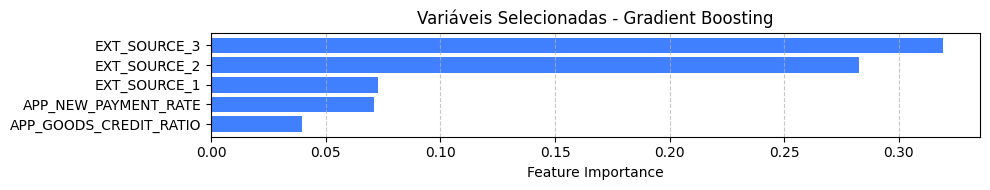

In [ ]:
# Obter importância das variáveis.
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância.
features = features.sort_values(by='Importance', ascending=False)

# Estabelecer um limite de corte, por exemplo, x% da importância máxima.
cutoff_maximp = 0.10

cutoff = cutoff_maximp * feature_importances.max()

# Selecionar variáveis acima do corte.
selected_features = X.columns[feature_importances > cutoff].tolist()
print('Número de features selecionadas: ',len(selected_features))

# Ordenar variáveis por importância.
features = features.sort_values(by='Importance', ascending=True)

# Filtrar o DataFrame para apenas as features acima do corte.
selected_features_df = features[features['Importance'] > cutoff]

# Ajusta o tamanho da figura com base no número de features selecionadas.
plt.figure(figsize=(10, len(selected_features_df)*0.4))

# Plota as features selecionadas.
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color=(0.25, 0.5, 1))
plt.xlabel('Feature Importance')
plt.title('Variáveis Selecionadas - Gradient Boosting')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Criando uma lista com as variáveis selecionadas.
selected_features_list = list(selected_features_df['Feature'])
print(selected_features_list)

['APP_GOODS_CREDIT_RATIO', 'APP_NEW_PAYMENT_RATE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']


In [ ]:
# Gerando a ABT filtrada, pós-seleção das variáveis.
abt_treino_06 = abt_treino_05[selected_features_list + ['TARGET', 'SK_ID_CURR']]
abt_teste_06 = abt_teste_05[selected_features_list + ['TARGET', 'SK_ID_CURR']]

In [ ]:
abt_treino_06.shape

(150679, 7)

In [ ]:
abt_treino_06.head()

,APP_GOODS_CREDIT_RATIO,APP_NEW_PAYMENT_RATE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET,SK_ID_CURR
45499,0.926613,0.056022,0.503186,0.246830,0.413597,0,102669
74186,0.703037,0.048840,0.495899,0.452236,0.276441,1,202196
65253,0.863260,0.078600,0.352115,0.135407,0.656158,0,272854
60400,0.893815,0.048105,0.398403,0.372591,0.510794,0,207628
71140,0.863260,0.048360,0.244596,0.317423,0.634706,1,244369


In [ ]:
abt_teste_06.shape

(64578, 7)

In [ ]:
abt_teste_06.head()

,APP_GOODS_CREDIT_RATIO,APP_NEW_PAYMENT_RATE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET,SK_ID_CURR
196348,1.000000,0.050000,0.217777,0.634658,0.554947,0,243431
147976,0.863260,0.054414,0.804014,0.501598,0.384207,0,127962
52662,1.000000,0.048640,0.503186,0.278945,0.300108,1,244667
101577,0.893814,0.042536,0.279232,0.213085,0.556727,0,220032
173078,0.834725,0.032421,0.583032,0.528639,0.510794,0,123746


### **Trazendo de volta as variáveis categóricas**

In [ ]:
# Concatenando as variáveis do abt de treino com as variáveis da abt de variáveis categóricas.
abt_treino_07 = pd.merge(abt_treino_06, df_categoricas_treino, on='SK_ID_CURR')
abt_treino_07.head()

,APP_GOODS_CREDIT_RATIO,APP_NEW_PAYMENT_RATE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0.926613,0.056022,0.503186,0.246830,0.413597,0,102669,Cash loans,F,N,...,Secondary / secondary special,Single / not married,House / apartment,Sales staff,FRIDAY,Business Entity Type 3,POD_VERIFICAR,block of flats,"Stone, brick",No
1,0.703037,0.048840,0.495899,0.452236,0.276441,1,202196,Cash loans,F,N,...,Higher education,Married,House / apartment,Laborers,THURSDAY,Business Entity Type 2,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR
2,0.863260,0.078600,0.352115,0.135407,0.656158,0,272854,Cash loans,F,N,...,Higher education,Single / not married,Rented apartment,Sales staff,SATURDAY,Self-employed,reg oper account,block of flats,"Stone, brick",No
3,0.893815,0.048105,0.398403,0.372591,0.510794,0,207628,Cash loans,F,N,...,Higher education,Married,House / apartment,Core staff,FRIDAY,School,org spec account,block of flats,"Stone, brick",No
4,0.863260,0.048360,0.244596,0.317423,0.634706,1,244369,Cash loans,F,N,...,Secondary / secondary special,Separated,House / apartment,Core staff,SUNDAY,Self-employed,reg oper account,specific housing,Mixed,No


In [ ]:
# Dropando coluna de Id.
abt_treino_07 = abt_treino_07.drop('SK_ID_CURR', axis=1)

In [ ]:
abt_treino_07.shape

(150679, 22)

In [ ]:
# Concatenando as variáveis do abt de teste com as variáveis da abt de variáveis categóricas.
abt_teste_07 = pd.merge(abt_teste_06, df_categoricas_teste, on='SK_ID_CURR')
abt_teste_07.head()

,APP_GOODS_CREDIT_RATIO,APP_NEW_PAYMENT_RATE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,1.000000,0.050000,0.217777,0.634658,0.554947,0,243431,Revolving loans,M,N,...,Secondary / secondary special,Single / not married,With parents,Laborers,WEDNESDAY,Business Entity Type 3,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR
1,0.863260,0.054414,0.804014,0.501598,0.384207,0,127962,Cash loans,F,N,...,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Business Entity Type 3,reg oper account,block of flats,Wooden,No
2,1.000000,0.048640,0.503186,0.278945,0.300108,1,244667,Cash loans,M,N,...,Secondary / secondary special,Civil marriage,House / apartment,Laborers,THURSDAY,Construction,POD_VERIFICAR,terraced house,Wooden,No
3,0.893814,0.042536,0.279232,0.213085,0.556727,0,220032,Cash loans,F,N,...,Secondary / secondary special,Married,With parents,Laborers,TUESDAY,Business Entity Type 3,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR
4,0.834725,0.032421,0.583032,0.528639,0.510794,0,123746,Cash loans,F,N,...,Higher education,Married,House / apartment,Core staff,TUESDAY,School,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR


In [ ]:
# Dropando coluna de Id.
abt_teste_07 = abt_teste_07.drop('SK_ID_CURR', axis=1)

In [ ]:
abt_teste_07.shape

(64578, 22)

<br>

## **Mapa de correlação de Pearson para as variáveis selecionadas**

<ipython-input-1092-b2d78d0e83a9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = abt_treino_07.corr()


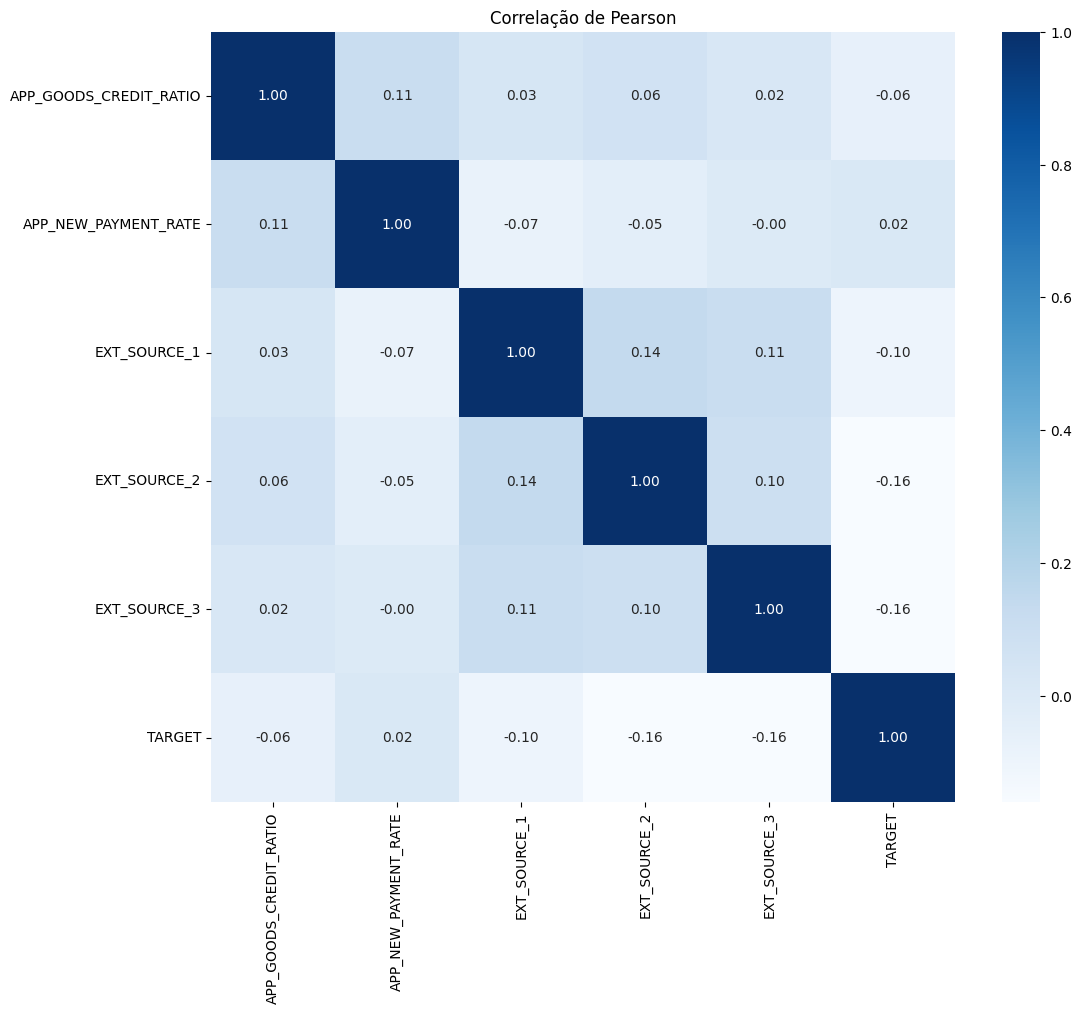

In [ ]:
# Calculando a correlação de Pearson.
corr_matrix = abt_treino_07.corr()

# Plotando o heatmap.
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt='.2f')
plt.title('Correlação de Pearson')
plt.show()

### **Verificação da força das variáveis explicativas com IV**

In [ ]:
# Criando função para o cálculo do WoE e IV.
def calculate_woe_iv(df, feature, target):
    """
    Calcula WoE (Weight of Evidence) e IV (Information Value) para uma variável.
    """
    lst = []
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': df[df[feature] == val].count()[feature],
            'Good': df[(df[feature] == val) & (df[target] == 1)].count()[feature],
            'Bad': df[(df[feature] == val) & (df[target] == 0)].count()[feature]
        })

    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()

    # Adicionando uma pequena constante para evitar divisão por zero.
    dset['Distr_Good'] = dset['Distr_Good'].replace({0: 1e-10})
    dset['Distr_Bad'] = dset['Distr_Bad'].replace({0: 1e-10})

    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()

    return iv


# Criando função para a criação de uma tabela com o IV das variáveis.
def iv_table(df, target):
    """
    Retorna uma tabela com IV para todas as variáveis em relação ao target.
    """
    iv_list = []
    for col in df.columns:
        if col == target:
            continue
        iv = calculate_woe_iv(df, col, target)
        if iv < 0.02:
            predictiveness = 'Inútil para a predição'
        elif iv < 0.1:
            predictiveness = 'Preditor Fraco'
        elif iv < 0.3:
            predictiveness = 'Preditor Moderado'
        else:
            predictiveness = 'Preditor Forte'
        iv_list.append({
            'Variável': col,
            'IV': iv,
            'Preditividade': predictiveness
        })

    return pd.DataFrame(iv_list).sort_values(by='IV', ascending=False)

In [ ]:
# Fazendo uma amostra dos dados.
abt_corr_aux_sample = abt_treino_07.sample(n=15000)

In [ ]:
# Chamando a função.
iv_df = iv_table(abt_corr_aux_sample, 'TARGET')
iv_df

,Variável,IV,Preditividade
3,EXT_SOURCE_2,27.213664,Preditor Forte
1,APP_NEW_PAYMENT_RATE,15.940691,Preditor Forte
2,EXT_SOURCE_1,12.294981,Preditor Forte
4,EXT_SOURCE_3,3.355374,Preditor Forte
0,APP_GOODS_CREDIT_RATIO,2.939657,Preditor Forte
16,ORGANIZATION_TYPE,0.216514,Preditor Moderado
14,OCCUPATION_TYPE,0.109135,Preditor Moderado
10,NAME_INCOME_TYPE,0.059271,Preditor Fraco
11,NAME_EDUCATION_TYPE,0.054264,Preditor Fraco
6,CODE_GENDER,0.039862,Preditor Fraco


### **Dropando colunas sensíveis e com preditor inútil ou fraco**

In [ ]:
# Lista de colunas que iremos dropar.
col_to_drop = ['CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'FLAG_OWN_CAR', 'WEEKDAY_APPR_PROCESS_START', 'NAME_HOUSING_TYPE', 'WALLSMATERIAL_MODE']

# Dropando as colunas do DataFrame.
abt_treino_08 = abt_treino_07.drop(columns=col_to_drop)
abt_teste_08 = abt_teste_07.drop(columns=col_to_drop)

<br>

## **Categorização das variáveis numéricas**

In [ ]:
# Verificando os metadados.
metadados_fs = pod_academy_generate_metadata(abt_treino_08,
                                          ids=[''],
                                          targets=['TARGET'],
                                          orderby = 'CARDINALIDADE')

metadados_fs

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,EXT_SOURCE_2,Explicativa,0,0.0,84606,float64
1,EXT_SOURCE_1,Explicativa,0,0.0,60797,float64
2,APP_NEW_PAYMENT_RATE,Explicativa,0,0.0,28020,float64
3,APP_GOODS_CREDIT_RATIO,Explicativa,0,0.0,2457,float64
4,EXT_SOURCE_3,Explicativa,0,0.0,787,float64
5,ORGANIZATION_TYPE,Explicativa,0,0.0,58,object
6,OCCUPATION_TYPE,Explicativa,0,0.0,19,object
7,NAME_INCOME_TYPE,Explicativa,0,0.0,8,object
8,NAME_EDUCATION_TYPE,Explicativa,0,0.0,5,object
9,NAME_FAMILY_STATUS,Explicativa,0,0.0,5,object


### **Tratamento de variáveis categóricas de alta cardinalidade (LabelEncoder)**

In [ ]:
# Criando uma cópia do df.
abt_treino_09 = abt_treino_08.copy()
abt_teste_09 = abt_teste_08.copy()

In [ ]:
# Definindo a cardinalidade mínima.
card_cutoff = 20

# Verificando as variáveis com alta cardinalidade e salvado elas em uma lista.
df_categ_labelenc = metadados_fs[(metadados_fs['CARDINALIDADE'] > card_cutoff) & (metadados_fs['TIPO_FEATURE'] == 'object')]
lista_vars_abt = list(abt_treino_09.columns)
lista_lenc = list(df_categ_labelenc.FEATURE.values)

# Iterando sobre as listas criadas.
for item in lista_drop_vars:
    if item in lista_lenc:
        lista_lenc.remove(item)

print('Lista de vars para Label Encoding: ', lista_lenc)

Lista de vars para Label Encoding:  ['ORGANIZATION_TYPE']


In [ ]:
# Criando um dicionário vazio.
encoders = {}

# Iterando para o encoding.
for col in lista_lenc:
    encoder = LabelEncoder()
    abt_treino_09[col] = encoder.fit_transform(abt_treino_09[col])

    # Armazenando o encoder para a coluna atual em um dicionário.
    encoders[col] = encoder

# Salvando o dicionário de encoders e a lista de colunas em um arquivo .pkl.
data_to_serialize_lenc = {
    'encoders': encoders,
    'columns': lista_lenc
}

with open('/content/drive/MyDrive/CREDIT_SCORING_SQUAD8/3_modelagem/Modelo_Regressao_Logistica/wagner/v18_fe_application_01/artefatos/prd_labelenc.pkl', 'wb') as f:
    pickle.dump(data_to_serialize_lenc, f)

In [ ]:
abt_treino_09.shape

(150679, 15)

In [ ]:
# Carregando os encoders e a lista de colunas.
with open('/content/drive/MyDrive/CREDIT_SCORING_SQUAD8/3_modelagem/Modelo_Regressao_Logistica/wagner/v18_fe_application_01/artefatos/prd_labelenc.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoders = loaded_data['encoders']
loaded_columns = loaded_data['columns']

# Aplicando na base de teste.
for col in loaded_columns:
    if col in loaded_encoders:
        # Transforma a coluna usando o encoder carregado.
        abt_teste_09[col] = loaded_encoders[col].transform(abt_teste_09[col])

In [ ]:
abt_teste_09.shape

(64578, 15)

In [ ]:
abt_treino_09.head()

,APP_GOODS_CREDIT_RATIO,APP_NEW_PAYMENT_RATE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE
0,0.926613,0.056022,0.503186,0.246830,0.413597,0,Cash loans,Commercial associate,Secondary / secondary special,Single / not married,Sales staff,5,POD_VERIFICAR,block of flats,No
1,0.703037,0.048840,0.495899,0.452236,0.276441,1,Cash loans,Working,Higher education,Married,Laborers,4,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR
2,0.863260,0.078600,0.352115,0.135407,0.656158,0,Cash loans,Working,Higher education,Single / not married,Sales staff,42,reg oper account,block of flats,No
3,0.893815,0.048105,0.398403,0.372591,0.510794,0,Cash loans,Working,Higher education,Married,Core staff,39,org spec account,block of flats,No
4,0.863260,0.048360,0.244596,0.317423,0.634706,1,Cash loans,Commercial associate,Secondary / secondary special,Separated,Core staff,42,reg oper account,specific housing,No


In [ ]:
abt_teste_09.head()

,APP_GOODS_CREDIT_RATIO,APP_NEW_PAYMENT_RATE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET,NAME_CONTRACT_TYPE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,EMERGENCYSTATE_MODE
0,1.000000,0.050000,0.217777,0.634658,0.554947,0,Revolving loans,Commercial associate,Secondary / secondary special,Single / not married,Laborers,5,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR
1,0.863260,0.054414,0.804014,0.501598,0.384207,0,Cash loans,Commercial associate,Secondary / secondary special,Single / not married,Laborers,5,reg oper account,block of flats,No
2,1.000000,0.048640,0.503186,0.278945,0.300108,1,Cash loans,Working,Secondary / secondary special,Civil marriage,Laborers,7,POD_VERIFICAR,terraced house,No
3,0.893814,0.042536,0.279232,0.213085,0.556727,0,Cash loans,Working,Secondary / secondary special,Married,Laborers,5,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR
4,0.834725,0.032421,0.583032,0.528639,0.510794,0,Cash loans,State servant,Higher education,Married,Core staff,39,POD_VERIFICAR,POD_VERIFICAR,POD_VERIFICAR


In [ ]:
# Verificando os metadados.
metadados_fs = pod_academy_generate_metadata(abt_treino_09,
                                          ids=[''],
                                          targets=['TARGET'],
                                          orderby = 'CARDINALIDADE')

metadados_fs

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,EXT_SOURCE_2,Explicativa,0,0.0,84606,float64
1,EXT_SOURCE_1,Explicativa,0,0.0,60797,float64
2,APP_NEW_PAYMENT_RATE,Explicativa,0,0.0,28020,float64
3,APP_GOODS_CREDIT_RATIO,Explicativa,0,0.0,2457,float64
4,EXT_SOURCE_3,Explicativa,0,0.0,787,float64
5,ORGANIZATION_TYPE,Explicativa,0,0.0,58,int64
6,OCCUPATION_TYPE,Explicativa,0,0.0,19,object
7,NAME_INCOME_TYPE,Explicativa,0,0.0,8,object
8,NAME_EDUCATION_TYPE,Explicativa,0,0.0,5,object
9,NAME_FAMILY_STATUS,Explicativa,0,0.0,5,object


### **Vamos verificar a ordenação da taxa de evento por categoria (baixa cardinalidade)**

In [ ]:
# Checando as variáveis com cadinalidade menor ou igual a 20.
df_ordinais = metadados_fs[(metadados_fs['CARDINALIDADE'] <= 20) & (metadados_fs['USO_FEATURE']=='Explicativa')]
df_ordinais

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
6,OCCUPATION_TYPE,Explicativa,0,0.0,19,object
7,NAME_INCOME_TYPE,Explicativa,0,0.0,8,object
8,NAME_EDUCATION_TYPE,Explicativa,0,0.0,5,object
9,NAME_FAMILY_STATUS,Explicativa,0,0.0,5,object
10,FONDKAPREMONT_MODE,Explicativa,0,0.0,5,object
11,HOUSETYPE_MODE,Explicativa,0,0.0,4,object
12,EMERGENCYSTATE_MODE,Explicativa,0,0.0,3,object
14,NAME_CONTRACT_TYPE,Explicativa,0,0.0,2,object


In [ ]:
# Criando uma lista com as variáveis selecionadas.
vars_ordinais = list(df_ordinais.FEATURE)
vars_ordinais

['OCCUPATION_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'EMERGENCYSTATE_MODE',
 'NAME_CONTRACT_TYPE']

In [ ]:
# Criando uma função para analisar a ordenação das variáveis.
def analyze_variable(dataframe, variable, target):

  # Crie uma cópia explícita do DataFrame.
  df_copy = dataframe.copy()

  # Se a variável for numérica, arredonda para 4 casas decimais.
  if pd.api.types.is_numeric_dtype(df_copy[variable]):
      df_copy[variable] = df_copy[variable].round(4)
      df_copy[variable] = df_copy[variable].astype(str)

  # Calcula a taxa de evento e o volume para cada categoria da variável.
  result = df_copy.groupby(variable).agg({target: 'mean', variable: 'count'}).rename(columns={variable: 'Volume'}).reset_index()
  result.columns = [variable, 'Taxa_de_Evento', 'Volume']

  # Ordena o resultado pela Taxa de Evento em ordem decrescente.
  result = result.sort_values(by='Taxa_de_Evento', ascending=False)

  # Plota o gráfico.
  fig, ax1 = plt.subplots(figsize=(12, 6))

  # Eixo Y esquerdo: Volume.
  bars = ax1.bar(result[variable], result['Volume'], color='lightblue', label='Volume (Barras)')
  ax1.set_xlabel(variable)
  ax1.set_ylabel('Volume', color='black')
  ax1.tick_params(axis='y', labelcolor='black')

  # Eixo Y direito: Taxa de Evento.
  ax2 = ax1.twinx()
  lines = ax2.plot(result[variable], result['Taxa_de_Evento'] * 100, marker='o', linestyle='-', color='hotpink', label='Taxa de Evento (Linha)')
  ax2.set_ylabel('Taxa de Evento (%)', color='black')
  ax2.tick_params(axis='y', labelcolor='black')

  # Combina as legendas de ambos os eixos, filtrando rótulos que começam com '_'.
  plots = [item for item in bars + tuple(lines) if not item.get_label().startswith('_')]
  labels = [plot.get_label() for plot in plots]
  plt.legend(plots, labels, loc='upper left')

  plt.title(f'Volume e Taxa de Evento por {variable}')
  ax1.set_xticks(result[variable])
  ax1.set_xticklabels(result[variable], rotation=45, ha='right')  # Ajuste para centralizar os rótulos.
  plt.tight_layout()
  plt.show()

  return result

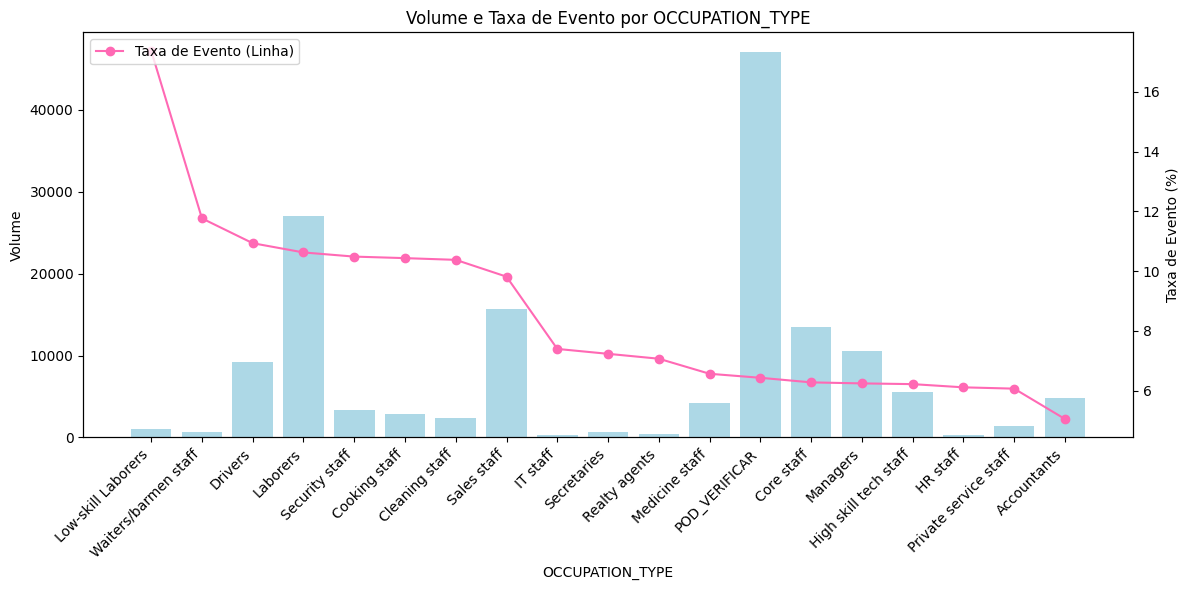

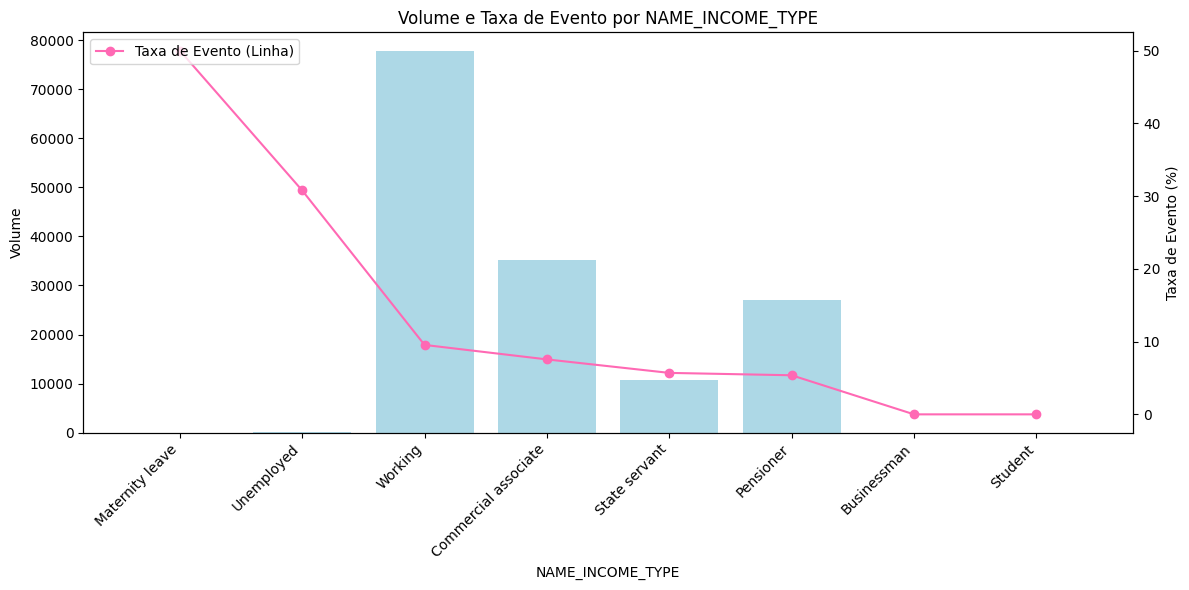

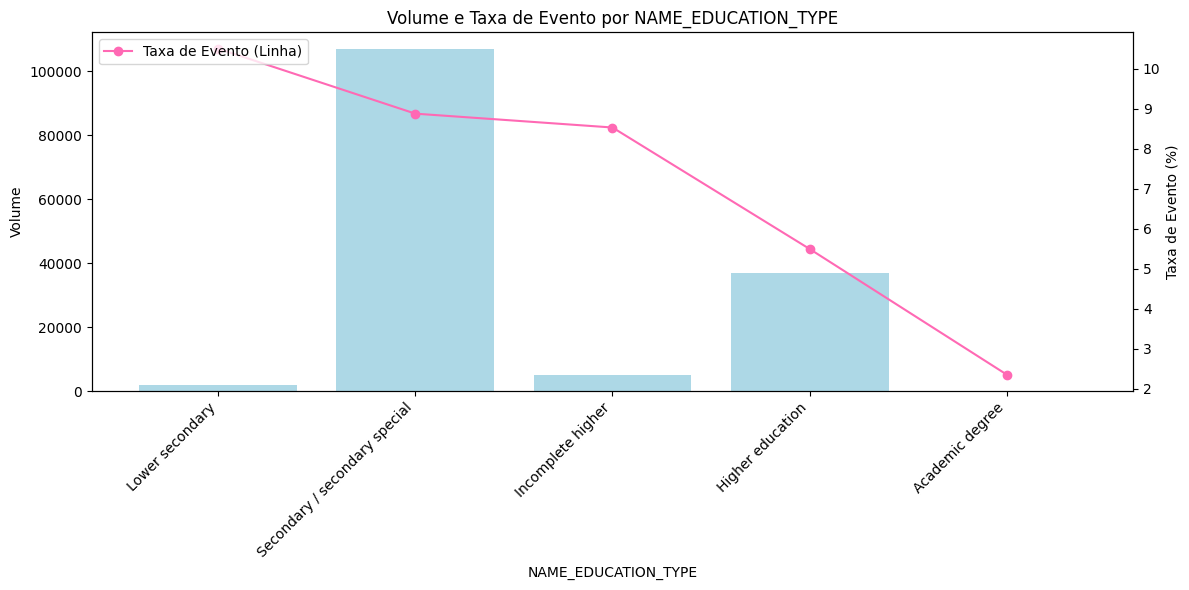

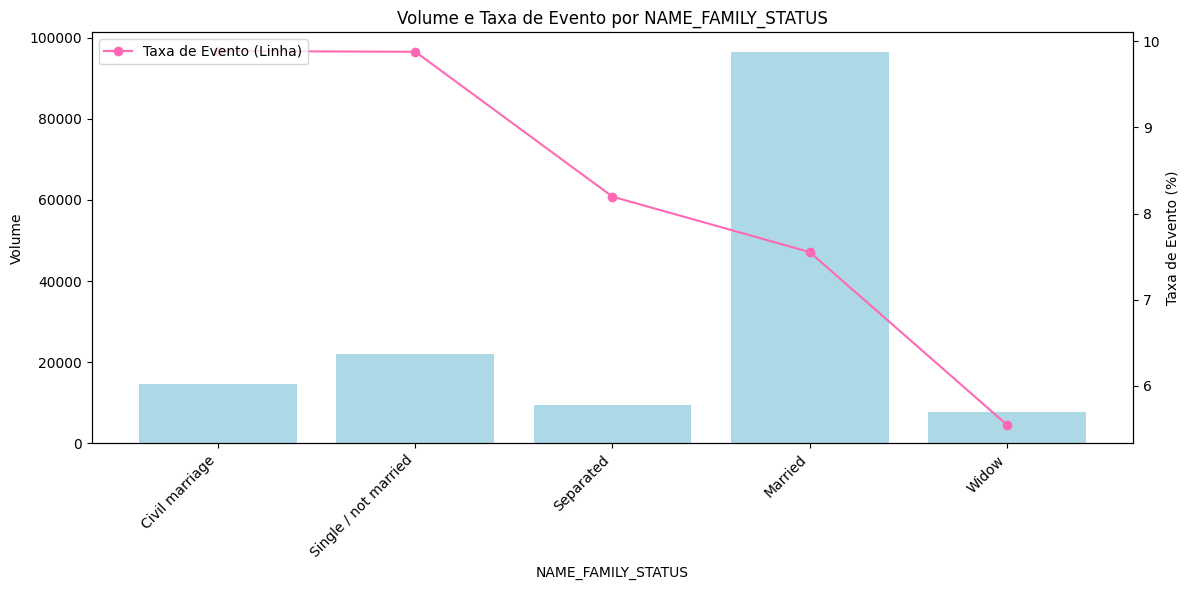

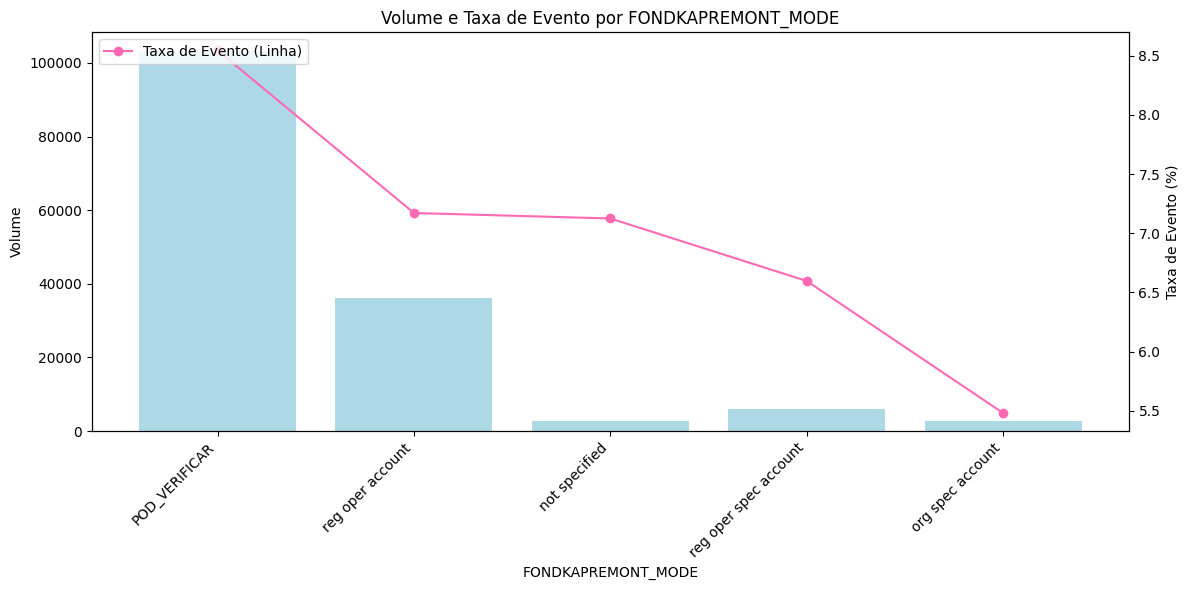

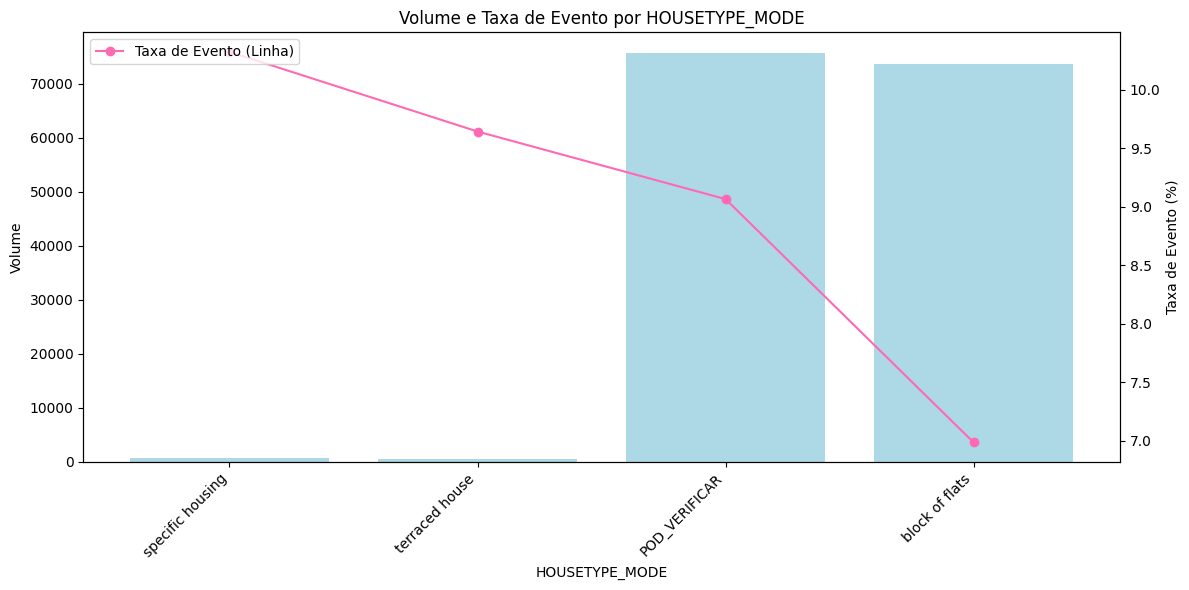

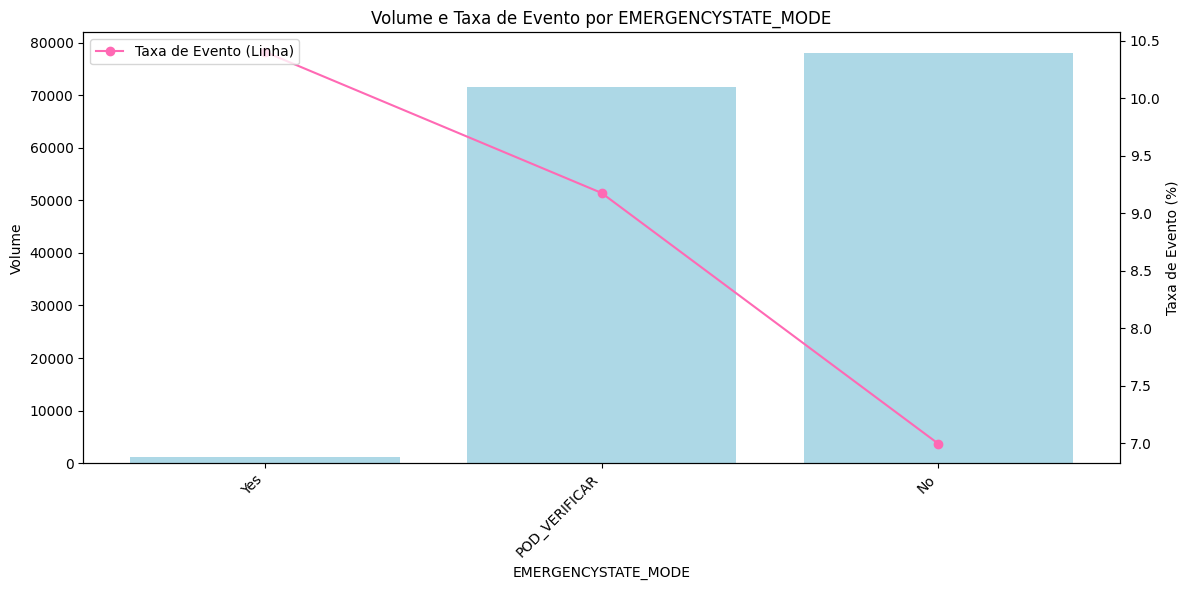

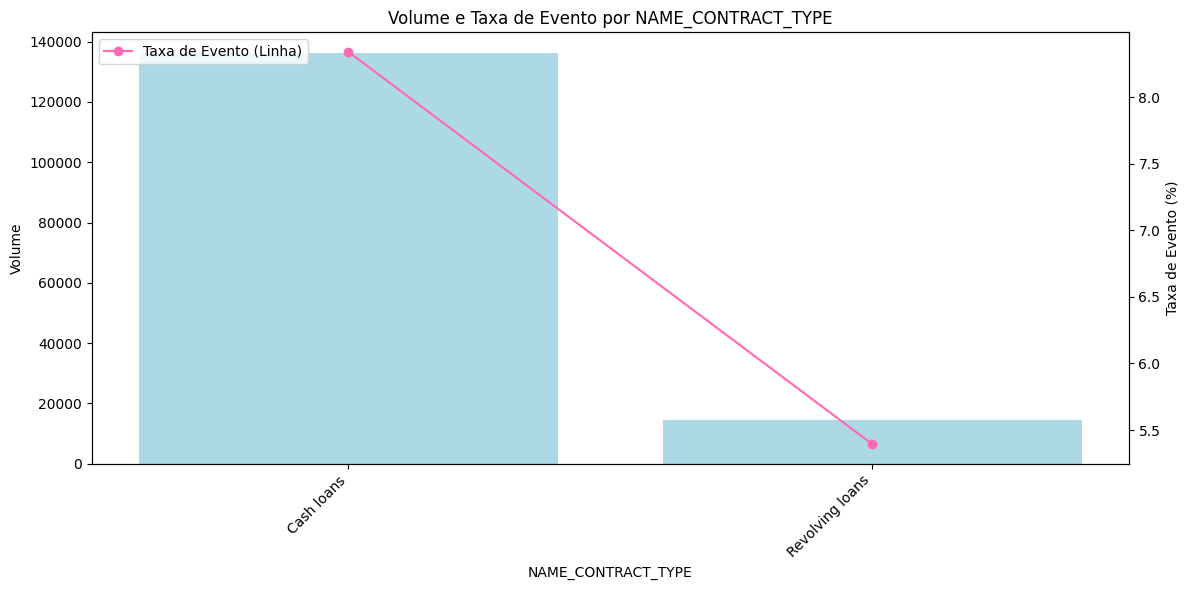

In [ ]:
# Chamando a função.
for var in vars_ordinais:
  result = analyze_variable(abt_treino_09, var, 'TARGET')

### **Agrupamento das categorias**

In [ ]:
# Criando uma função para o agrupamento.
def group_and_plot_by_safra2(dataframe, target, explicativa, domain_mapping):

  df_copy = dataframe.copy()
  # Se a variável explicativa for numérica, arredonda para 4 casas decimais e converte para string
  if pd.api.types.is_numeric_dtype(df_copy[explicativa]):
      df_copy[explicativa] = df_copy[explicativa].apply(lambda x: round(x, 4)).astype(str)

  # Cria uma coluna com os valores originais para mostrar a transformação posteriormente
  df_copy['original_' + explicativa] = df_copy[explicativa]

  # Aplica o mapeamento para os novos domínios
  df_copy[explicativa] = df_copy[explicativa].map(domain_mapping).fillna(df_copy[explicativa])

  # Cria um DataFrame de transformação
  transformation_df = df_copy[[explicativa, 'original_' + explicativa]].drop_duplicates().sort_values(by='original_' + explicativa)
  transformation_df.rename(columns={explicativa:'TFB_'+explicativa,'original_' + explicativa:explicativa},inplace=True)

  return transformation_df


def apply_grouping(data, transformation_df, explicativa):

  import pandas as pd
  df_copy = data.copy()

  if pd.api.types.is_numeric_dtype(df_copy[explicativa]):
    df_copy[explicativa] = df_copy[explicativa].apply(lambda x: round(x, 4)).astype(str)

  # Une o DataFrame de transformação com os novos dados para aplicar a transformação
  df_copy = df_copy.merge(transformation_df, left_on=explicativa, right_on=explicativa, how='left')

  # Aplica a transformação
  colname_transformed = 'TFB_' + explicativa
  df_copy[explicativa] = df_copy[colname_transformed].fillna(df_copy[explicativa])

  # Remove a coluna original
  df_copy.drop(columns=[explicativa], inplace=True)

  return df_copy


# Criando função para plotar os gráficos de treino e teste com a ordenação.
def analyze_variable_train_and_test(train, test, variable, target, figsize=None):

  import pandas as pd
  import matplotlib.pyplot as plt

  # Concatenate train and test datasets
  concatenated_data = pd.concat([train, test], keys=['Train', 'Test'], names=['Dataset'])

  # Se a variável for numérica, arredonda para 4 casas decimais
  if pd.api.types.is_numeric_dtype(concatenated_data[variable]):
      concatenated_data[variable] = concatenated_data[variable].round(4)
      concatenated_data[variable] = concatenated_data[variable].astype(str)

  # Calcula a taxa de evento e o volume para cada categoria da variável
  result = concatenated_data.groupby([variable, 'Dataset']).agg({target: 'mean', variable: 'count'}).rename(columns={variable: 'Volume'}).reset_index()
  result.columns = [variable, 'Dataset', 'Taxa_de_Evento', 'Volume']

  # Ordena o resultado pela Taxa de Evento em ordem decrescente
  result = result.sort_values(by=['Dataset', 'Taxa_de_Evento'], ascending=[True, False])

  # Plota o gráfico
  if figsize == None:
      fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
  else:
      fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)

  # Aumenta o espaçamento horizontal entre gráficos
  plt.subplots_adjust(wspace=0.5)

  # Eixo Y esquerdo: Volume - Train
  bars_train = ax1.bar(result[result['Dataset'] == 'Train'][variable], result[result['Dataset'] == 'Train']['Volume'], color='lightblue', label='Volume (Barras)')
  ax1.set_xlabel(variable)
  ax1.set_ylabel('Volume', color='black')
  ax1.tick_params(axis='y', labelcolor='black')

  # Eixo Y direito: Taxa de Evento - Train
  ax2_train = ax1.twinx()
  lines_train = ax2_train.plot(result[result['Dataset'] == 'Train'][variable], result[result['Dataset'] == 'Train']['Taxa_de_Evento'] * 100, marker='o', linestyle='-', color='hotpink')
  ax2_train.set_ylabel('Taxa de Evento (%)', color='black')
  ax2_train.tick_params(axis='y', labelcolor='black')

  # Adiciona título ao gráfico de Treino
  ax1.set_title('Treino')
  plt.grid(False)

  # Eixo Y esquerdo: Volume - Test
  bars_test = ax2.bar(result[result['Dataset'] == 'Test'][variable], result[result['Dataset'] == 'Test']['Volume'], color='lightblue', label='Volume (Barras)')
  ax2.set_xlabel(variable)
  ax2.set_ylabel('Volume', color='black')
  ax2.tick_params(axis='y', labelcolor='black')

  # Eixo Y direito: Taxa de Evento - Test
  ax2_test = ax2.twinx()
  lines_test = ax2_test.plot(result[result['Dataset'] == 'Test'][variable], result[result['Dataset'] == 'Test']['Taxa_de_Evento'] * 100, marker='o', linestyle='-', color='hotpink')

  # Adiciona legendas apenas para as linhas - Train
  ax2_train.legend(lines_train, ['Taxa de Evento'], loc='best')

  # Adiciona legendas apenas para as linhas - Test
  ax2_test.legend(lines_test, ['Taxa de Evento'], loc='best')

  # Adiciona título ao gráfico de Teste
  ax2.set_title('Teste')

  # Aumenta o espaçamento vertical entre linhas
  plt.subplots_adjust(hspace=0.5)

  plt.suptitle(f'Volume e Taxa de Evento por {variable}', y=1.05, fontsize=13)
  plt.xticks(rotation=45)  # Adicionado para melhor visualização dos labels no eixo X
  plt.tight_layout()

  ax1.grid(False)
  ax2.grid(False)
  plt.grid(False)

  return result

**Agrupando a variável EMERGENCYSTATE_MODE**

In [ ]:
# Gerando o dicionário de domínios.
unique_values = abt_treino_09['EMERGENCYSTATE_MODE'].unique()
domain_map = {value: value for value in unique_values}

print("domain_map = {")
for key, value in domain_map.items():
    print(f"               '{key}': '{value}',")
print("              }")

domain_map = {
               'No': 'No',
               'POD_VERIFICAR': 'POD_VERIFICAR',
               'Yes': 'Yes',
              }


In [ ]:
# Ajustando manualmente os agrupamentos de domínios

domain_map = {
               'No': 'No',
               'POD_VERIFICAR': 'Yes',
               'Yes': 'Yes',
              }

In [ ]:
# Aplicando a transformação e gerando dataframe 'transformation' com as mudanças de domínios
transformation = group_and_plot_by_safra2(abt_treino_09, 'TARGET', 'EMERGENCYSTATE_MODE', domain_map)


# Aplicando as transformações e (criando novas tabelas)

# Aplica nos dados de treino
abt_treino_10 = apply_grouping(abt_treino_09, transformation, 'EMERGENCYSTATE_MODE')

# Aplica nos dados de teste
abt_teste_10 = apply_grouping(abt_teste_09, transformation, 'EMERGENCYSTATE_MODE')

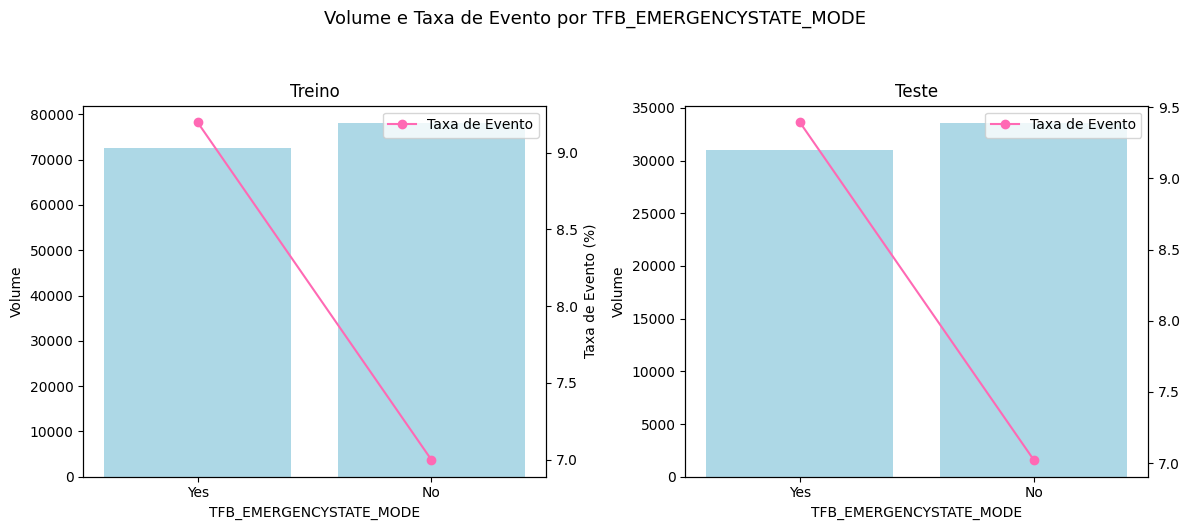

In [ ]:
# Visualizando a ordenação nos dados de treino e test (usar prefixo TFB_ no nome da variável).
result = analyze_variable_train_and_test(abt_treino_10, abt_teste_10, 'TFB_EMERGENCYSTATE_MODE', 'TARGET')

**Agrupando a variável FONDKAPREMONT_MODE**

In [ ]:
# Gerando o dicionário de domínios.
unique_values = abt_treino_10['FONDKAPREMONT_MODE'].unique()
domain_map = {value: value for value in unique_values}

print("domain_map = {")
for key, value in domain_map.items():
    print(f"               '{key}': '{value}',")
print("              }")

domain_map = {
               'POD_VERIFICAR': 'POD_VERIFICAR',
               'reg oper account': 'reg oper account',
               'org spec account': 'org spec account',
               'reg oper spec account': 'reg oper spec account',
               'not specified': 'not specified',
              }


In [ ]:
# Ajustando manualmente os agrupamentos de domínios

domain_map = {
               'POD_VERIFICAR': 'POD_VERIFICAR',
               'reg oper account': 'POD_VERIFICAR',
               'org spec account': 'org spec account',
               'reg oper spec account': 'org spec account',
               'not specified': 'POD_VERIFICAR',
              }

In [ ]:
# Aplicando a transformação e gerando dataframe 'transformation' com as mudanças de domínios
transformation = group_and_plot_by_safra2(abt_treino_10, 'TARGET', 'FONDKAPREMONT_MODE', domain_map)


# Aplicando as transformações e (criando novas tabelas)

# Aplica nos dados de treino
abt_treino_11 = apply_grouping(abt_treino_10, transformation, 'FONDKAPREMONT_MODE')

# Aplica nos dados de teste
abt_teste_11 = apply_grouping(abt_teste_10, transformation, 'FONDKAPREMONT_MODE')

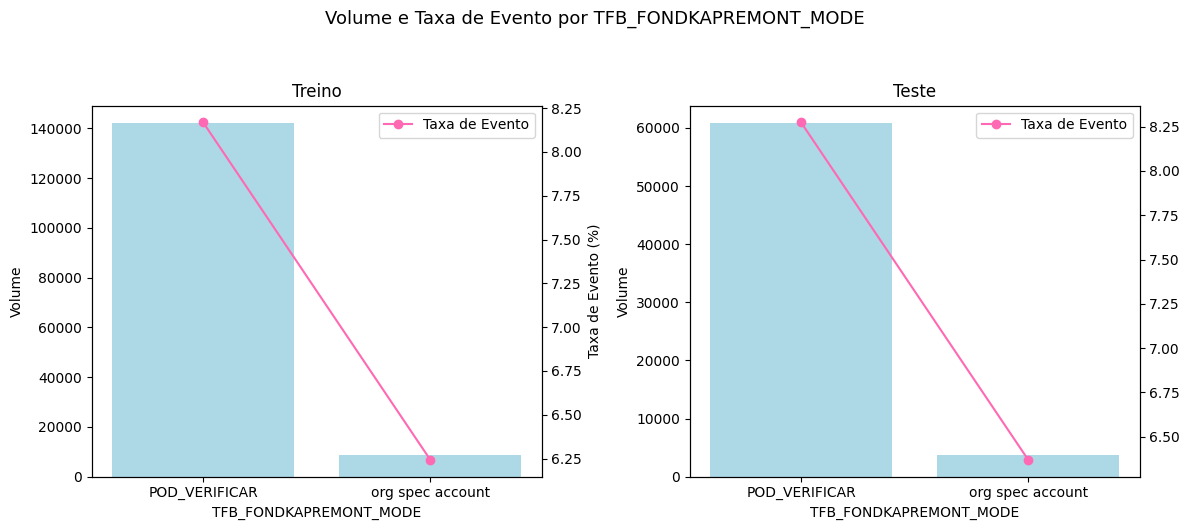

In [ ]:
# Visualizando a ordenação nos dados de treino e test (usar prefixo TFB_ no nome da variável).
result = analyze_variable_train_and_test(abt_treino_11, abt_teste_11, 'TFB_FONDKAPREMONT_MODE', 'TARGET')

**Agrupando a variável HOUSETYPE_MODE**

In [ ]:
# Gerando o dicionário de domínios.
unique_values = abt_treino_11['HOUSETYPE_MODE'].unique()
domain_map = {value: value for value in unique_values}

print("domain_map = {")
for key, value in domain_map.items():
    print(f"               '{key}': '{value}',")
print("              }")

domain_map = {
               'block of flats': 'block of flats',
               'POD_VERIFICAR': 'POD_VERIFICAR',
               'specific housing': 'specific housing',
               'terraced house': 'terraced house',
              }


In [ ]:
# Ajustando manualmente os agrupamentos de domínios

domain_map = {
               'block of flats': 'block of flats',
               'POD_VERIFICAR': 'POD_VERIFICAR',
               'specific housing': 'terraced house',
               'terraced house': 'terraced house',
              }

In [ ]:
# Aplicando a transformação e gerando dataframe 'transformation' com as mudanças de domínios
transformation = group_and_plot_by_safra2(abt_treino_11, 'TARGET', 'HOUSETYPE_MODE', domain_map)


# Aplicando as transformações e (criando novas tabelas)

# Aplica nos dados de treino
abt_treino_12 = apply_grouping(abt_treino_11, transformation, 'HOUSETYPE_MODE')

# Aplica nos dados de teste
abt_teste_12 = apply_grouping(abt_teste_11, transformation, 'HOUSETYPE_MODE')

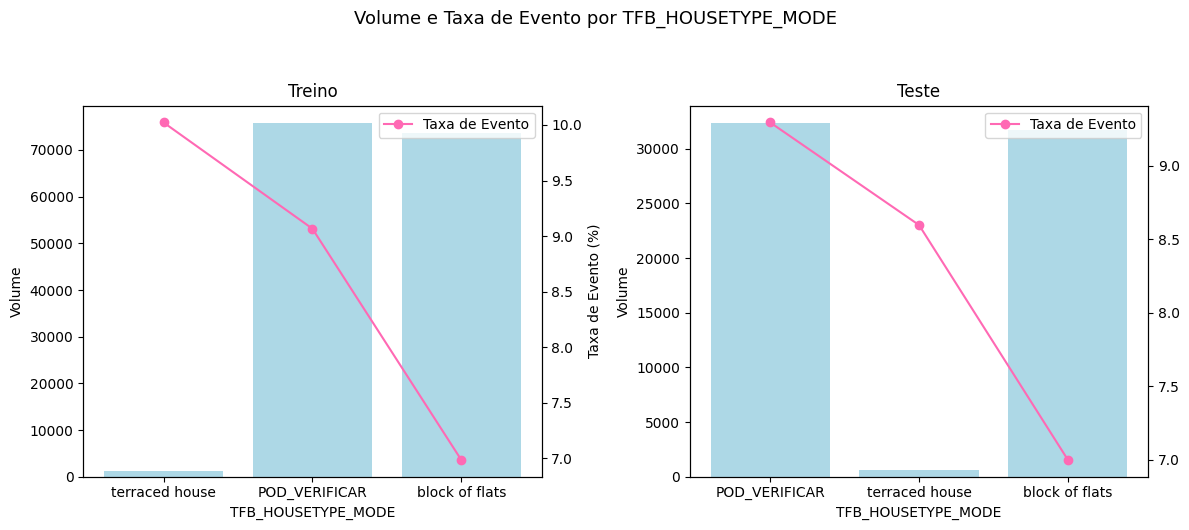

In [ ]:
# Visualizando a ordenação nos dados de treino e test (usar prefixo TFB_ no nome da variável).
result = analyze_variable_train_and_test(abt_treino_12, abt_teste_12, 'TFB_HOUSETYPE_MODE', 'TARGET')

**Agrupando a variável NAME_EDUCATION_TYPE**

In [ ]:
# Gerando o dicionário de domínios.
unique_values = abt_treino_12['NAME_EDUCATION_TYPE'].unique()
domain_map = {value: value for value in unique_values}

print("domain_map = {")
for key, value in domain_map.items():
    print(f"               '{key}': '{value}',")
print("              }")

domain_map = {
               'Secondary / secondary special': 'Secondary / secondary special',
               'Higher education': 'Higher education',
               'Incomplete higher': 'Incomplete higher',
               'Lower secondary': 'Lower secondary',
               'Academic degree': 'Academic degree',
              }


In [ ]:
# Ajustando manualmente os agrupamentos de domínios

domain_map = {
               'Secondary / secondary special': 'Lower secondary',
               'Higher education': 'Higher education',
               'Incomplete higher': 'Lower secondary',
               'Lower secondary': 'Lower secondary',
               'Academic degree': 'Academic degree',
              }

In [ ]:
# Aplicando a transformação e gerando dataframe 'transformation' com as mudanças de domínios
transformation = group_and_plot_by_safra2(abt_treino_12, 'TARGET', 'NAME_EDUCATION_TYPE', domain_map)


# Aplicando as transformações e (criando novas tabelas)

# Aplica nos dados de treino
abt_treino_13 = apply_grouping(abt_treino_12, transformation, 'NAME_EDUCATION_TYPE')

# Aplica nos dados de teste
abt_teste_13 = apply_grouping(abt_teste_12, transformation, 'NAME_EDUCATION_TYPE')

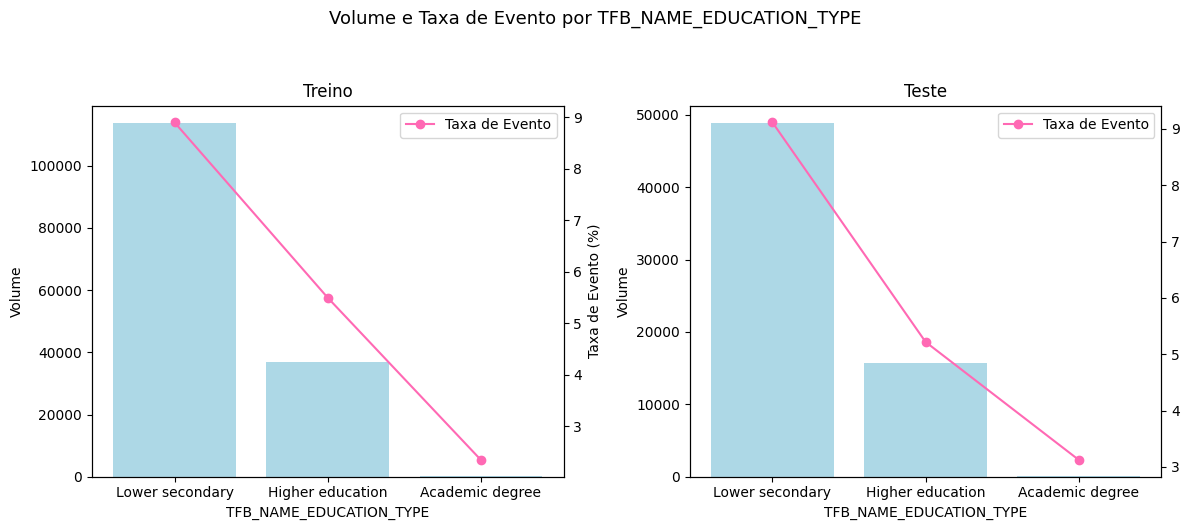

In [ ]:
# Visualizando a ordenação nos dados de treino e test (usar prefixo TFB_ no nome da variável).
result = analyze_variable_train_and_test(abt_treino_13, abt_teste_13, 'TFB_NAME_EDUCATION_TYPE', 'TARGET')

**Agrupando a variável NAME_FAMILY_STATUS**

In [ ]:
# Gerando o dicionário de domínios.
unique_values = abt_treino_13['NAME_FAMILY_STATUS'].unique()
domain_map = {value: value for value in unique_values}

print("domain_map = {")
for key, value in domain_map.items():
    print(f"               '{key}': '{value}',")
print("              }")

domain_map = {
               'Single / not married': 'Single / not married',
               'Married': 'Married',
               'Separated': 'Separated',
               'Widow': 'Widow',
               'Civil marriage': 'Civil marriage',
              }


In [ ]:
# Ajustando manualmente os agrupamentos de domínios

domain_map = {
               'Single / not married': 'Civil marriage',
               'Married': 'Married',
               'Separated': 'Married',
               'Widow': 'Widow',
               'Civil marriage': 'Civil marriage',
              }

In [ ]:
# Aplicando a transformação e gerando dataframe 'transformation' com as mudanças de domínios
transformation = group_and_plot_by_safra2(abt_treino_13, 'TARGET', 'NAME_FAMILY_STATUS', domain_map)


# Aplicando as transformações e (criando novas tabelas)

# Aplica nos dados de treino
abt_treino_14 = apply_grouping(abt_treino_13, transformation, 'NAME_FAMILY_STATUS')

# Aplica nos dados de teste
abt_teste_14 = apply_grouping(abt_teste_13, transformation, 'NAME_FAMILY_STATUS')

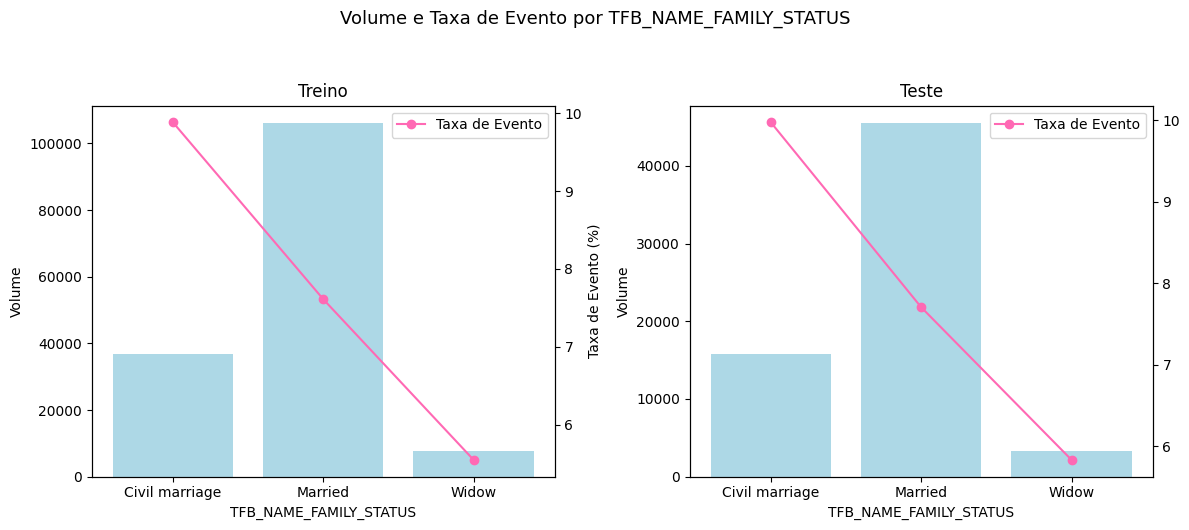

In [ ]:
# Visualizando a ordenação nos dados de treino e test (usar prefixo TFB_ no nome da variável).
result = analyze_variable_train_and_test(abt_treino_14, abt_teste_14, 'TFB_NAME_FAMILY_STATUS', 'TARGET')

**Agrupando a variável NAME_INCOME_TYPE**

In [ ]:
# Gerando o dicionário de domínios.
unique_values = abt_treino_14['NAME_INCOME_TYPE'].unique()
domain_map = {value: value for value in unique_values}

print("domain_map = {")
for key, value in domain_map.items():
    print(f"               '{key}': '{value}',")
print("              }")

domain_map = {
               'Commercial associate': 'Commercial associate',
               'Working': 'Working',
               'Pensioner': 'Pensioner',
               'State servant': 'State servant',
               'Unemployed': 'Unemployed',
               'Student': 'Student',
               'Businessman': 'Businessman',
               'Maternity leave': 'Maternity leave',
              }


In [ ]:
# Ajustando manualmente os agrupamentos de domínios

domain_map = {
               'Commercial associate': 'Student',
               'Working': 'Student',
               'Pensioner': 'Student',
               'State servant': 'Student',
               'Unemployed': 'Unemployed',
               'Student': 'Student',
               'Businessman': 'Student',
               'Maternity leave': 'Maternity leave',
              }

In [ ]:
# Aplicando a transformação e gerando dataframe 'transformation' com as mudanças de domínios
transformation = group_and_plot_by_safra2(abt_treino_14, 'TARGET', 'NAME_INCOME_TYPE', domain_map)


# Aplicando as transformações e (criando novas tabelas)

# Aplica nos dados de treino
abt_treino_15 = apply_grouping(abt_treino_14, transformation, 'NAME_INCOME_TYPE')

# Aplica nos dados de teste
abt_teste_15 = apply_grouping(abt_teste_14, transformation, 'NAME_INCOME_TYPE')

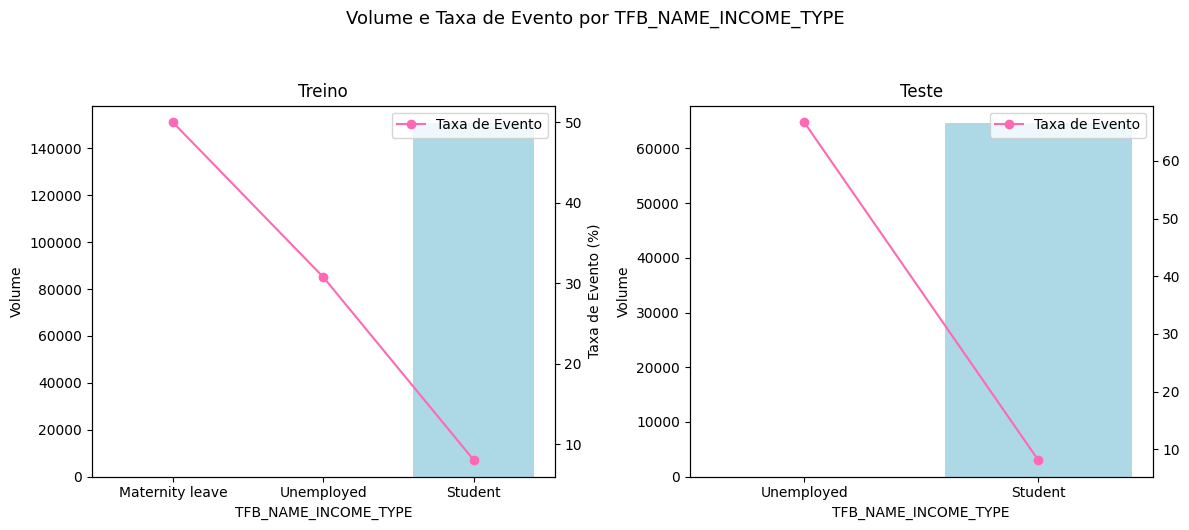

In [ ]:
# Visualizando a ordenação nos dados de treino e test (usar prefixo TFB_ no nome da variável).
result = analyze_variable_train_and_test(abt_treino_15, abt_teste_15, 'TFB_NAME_INCOME_TYPE', 'TARGET')

**Agrupando a variável OCCUPATION_TYPE**

In [ ]:
# Gerando o dicionário de domínios.
unique_values = abt_treino_15['OCCUPATION_TYPE'].unique()
domain_map = {value: value for value in unique_values}

print("domain_map = {")
for key, value in domain_map.items():
    print(f"               '{key}': '{value}',")
print("              }")

domain_map = {
               'Sales staff': 'Sales staff',
               'Laborers': 'Laborers',
               'Core staff': 'Core staff',
               'POD_VERIFICAR': 'POD_VERIFICAR',
               'Managers': 'Managers',
               'Cleaning staff': 'Cleaning staff',
               'Security staff': 'Security staff',
               'Accountants': 'Accountants',
               'Low-skill Laborers': 'Low-skill Laborers',
               'High skill tech staff': 'High skill tech staff',
               'Drivers': 'Drivers',
               'Cooking staff': 'Cooking staff',
               'Private service staff': 'Private service staff',
               'Medicine staff': 'Medicine staff',
               'Secretaries': 'Secretaries',
               'Waiters/barmen staff': 'Waiters/barmen staff',
               'Realty agents': 'Realty agents',
               'IT staff': 'IT staff',
               'HR staff': 'HR staff',
              }


In [ ]:
# Ajustando manualmente os agrupamentos de domínios

domain_map = {
               'Sales staff': 'Waiters/barmen staff',
               'Laborers': 'Waiters/barmen staff',
               'Core staff': 'Accountants',
               'POD_VERIFICAR': 'Accountants',
               'Managers': 'Accountants',
               'Cleaning staff': 'Waiters/barmen staff',
               'Security staff': 'Waiters/barmen staff',
               'Accountants': 'Accountants',
               'Low-skill Laborers': 'Low-skill Laborers',
               'High skill tech staff': 'Accountants',
               'Drivers': 'Waiters/barmen staff',
               'Cooking staff': 'Waiters/barmen staff',
               'Private service staff': 'Accountants',
               'Medicine staff': 'Accountants',
               'Secretaries': 'Accountants',
               'Waiters/barmen staff': 'Waiters/barmen staff',
               'Realty agents': 'Accountants',
               'IT staff': 'Accountants',
               'HR staff': 'Accountants',
              }

In [ ]:
# Aplicando a transformação e gerando dataframe 'transformation' com as mudanças de domínios
transformation = group_and_plot_by_safra2(abt_treino_15, 'TARGET', 'OCCUPATION_TYPE', domain_map)


# Aplicando as transformações e (criando novas tabelas)

# Aplica nos dados de treino
abt_treino_16 = apply_grouping(abt_treino_15, transformation, 'OCCUPATION_TYPE')

# Aplica nos dados de teste
abt_teste_16 = apply_grouping(abt_teste_15, transformation, 'OCCUPATION_TYPE')

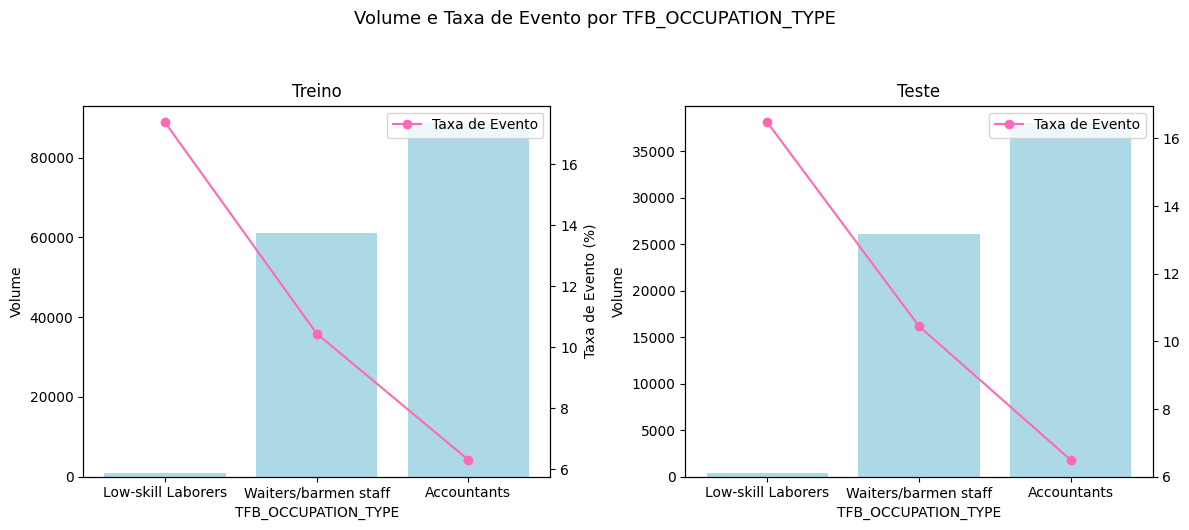

In [ ]:
# Visualizando a ordenação nos dados de treino e test (usar prefixo TFB_ no nome da variável).
result = analyze_variable_train_and_test(abt_treino_16, abt_teste_16, 'TFB_OCCUPATION_TYPE', 'TARGET')

### **Categorização das variáveis numéricas (alta cardinalidade)**

In [ ]:
df_numericas = metadados_fs[(metadados_fs['CARDINALIDADE'] > 20) & (metadados_fs['USO_FEATURE']=='Explicativa')]
df_numericas

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,EXT_SOURCE_2,Explicativa,0,0.0,84606,float64
1,EXT_SOURCE_1,Explicativa,0,0.0,60797,float64
2,APP_NEW_PAYMENT_RATE,Explicativa,0,0.0,28020,float64
3,APP_GOODS_CREDIT_RATIO,Explicativa,0,0.0,2457,float64
4,EXT_SOURCE_3,Explicativa,0,0.0,787,float64
5,ORGANIZATION_TYPE,Explicativa,0,0.0,58,int64


In [ ]:
vars_numericas = list(df_numericas.FEATURE)
vars_numericas

['EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'APP_NEW_PAYMENT_RATE',
 'APP_GOODS_CREDIT_RATIO',
 'EXT_SOURCE_3',
 'ORGANIZATION_TYPE']

In [ ]:
# Criando uma função para categorização das variáveis.
def categorize_with_decision_tree(dataframe, n_categories, target, numeric_var):

  # Preparar os dados.
  X = dataframe[[numeric_var]]
  y = dataframe[target]

  # Treinar uma árvore de decisão com profundidade máxima igual ao número de categorias desejadas.
  tree = DecisionTreeClassifier(max_leaf_nodes=n_categories)
  tree.fit(X, y)

  # Predizer a categoria (folha) para cada entrada no DataFrame.
  leaf_ids = tree.apply(X)

  # Criar um DataFrame temporário com as categorias (folhas), a variável numérica e o target.
  temp_df = pd.DataFrame({numeric_var: dataframe[numeric_var], 'Leaf': leaf_ids, target: y})

  result = temp_df.groupby('Leaf').agg({target: 'mean', numeric_var: ['count', 'min', 'max']}).reset_index()
  result.columns = ['Leaf', 'Taxa_de_Evento', 'Volume', 'Lower_Bound', 'Upper_Bound']

  # Ajuste para garantir que os limites superior e inferior de bins adjacentes não se sobreponham.
  result = result.sort_values(by='Lower_Bound')
  for i in range(1, len(result)):
      result.iloc[i, 3] = max(result.iloc[i, 3], result.iloc[i-1, 4])

  # Definir o limite inferior do primeiro bin como -inf e o limite superior do último bin como inf.
  result.iloc[0, 3] = -np.inf
  result.iloc[-1, 4] = np.inf

  return result


# Criando uma função para criação dos bins.
def apply_tree_bins(data, transformation_df, numeric_var):

  # Criando uma cópia do DataFrame.
  df_copy = data.copy()

  # Obtenha os limites superiores e ordene-os.
  upper_bounds = transformation_df['Upper_Bound'].sort_values().values

  # Use numpy.digitize para determinar a qual bin cada valor pertence.
  df_copy[f"TFT_{numeric_var}"] = np.digitize(df_copy[numeric_var].values, upper_bounds)
  df_copy.drop(axis=1,columns=[numeric_var],inplace=True)

  return df_copy

**Analisando a variável EXT_SOURCE_2**

In [ ]:
result = categorize_with_decision_tree(abt_treino_16, n_categories=5, target='TARGET', numeric_var='EXT_SOURCE_2')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
3,7,0.379048,525,-inf,0.008336
4,8,0.213543,6542,0.008364,0.125908
0,4,0.122365,31210,0.125927,0.397333
1,5,0.072580,68035,0.397343,0.647892
2,6,0.040300,44367,0.647897,inf


In [ ]:
abt_treino_17 = apply_tree_bins(abt_treino_16, result, numeric_var='EXT_SOURCE_2')
abt_treino_17.head()

,APP_GOODS_CREDIT_RATIO,APP_NEW_PAYMENT_RATE,EXT_SOURCE_1,EXT_SOURCE_3,TARGET,NAME_CONTRACT_TYPE,ORGANIZATION_TYPE,TFB_EMERGENCYSTATE_MODE,TFB_FONDKAPREMONT_MODE,TFB_HOUSETYPE_MODE,TFB_NAME_EDUCATION_TYPE,TFB_NAME_FAMILY_STATUS,TFB_NAME_INCOME_TYPE,TFB_OCCUPATION_TYPE,TFT_EXT_SOURCE_2
0,0.926613,0.056022,0.503186,0.413597,0,Cash loans,5,No,POD_VERIFICAR,block of flats,Lower secondary,Civil marriage,Student,Waiters/barmen staff,2
1,0.703037,0.048840,0.495899,0.276441,1,Cash loans,4,Yes,POD_VERIFICAR,POD_VERIFICAR,Higher education,Married,Student,Waiters/barmen staff,3
2,0.863260,0.078600,0.352115,0.656158,0,Cash loans,42,No,POD_VERIFICAR,block of flats,Higher education,Civil marriage,Student,Waiters/barmen staff,2
3,0.893815,0.048105,0.398403,0.510794,0,Cash loans,39,No,org spec account,block of flats,Higher education,Married,Student,Accountants,2
4,0.863260,0.048360,0.244596,0.634706,1,Cash loans,42,No,POD_VERIFICAR,terraced house,Lower secondary,Married,Student,Accountants,2


In [ ]:
abt_teste_17 = apply_tree_bins(abt_teste_16, result, numeric_var='EXT_SOURCE_2')

In [ ]:
abt_treino_17.TFT_EXT_SOURCE_2.unique()

array([2, 3, 4, 1, 0])

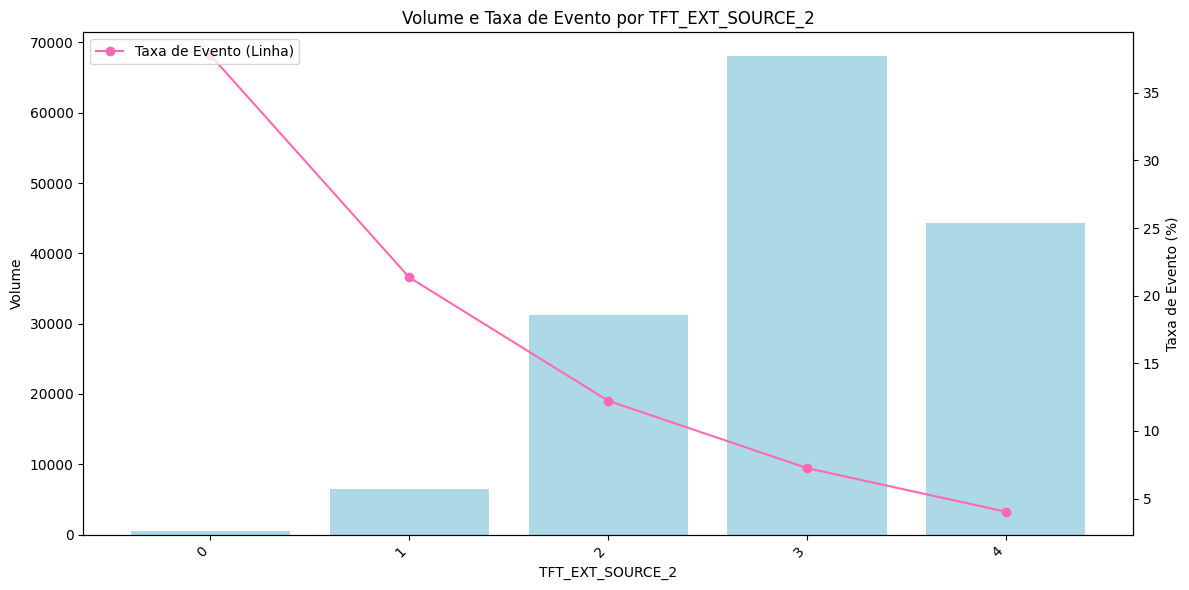

In [ ]:
result = analyze_variable(abt_treino_17, 'TFT_EXT_SOURCE_2', 'TARGET')

In [ ]:
result

,TFT_EXT_SOURCE_2,Taxa_de_Evento,Volume
0,0,0.377863,524
1,1,0.213543,6542
2,2,0.122372,31208
3,3,0.072580,68035
4,4,0.040320,44370


**Analisando a variável EXT_SOURCE_3**

In [ ]:
result = categorize_with_decision_tree(abt_treino_17, n_categories=5, target='TARGET', numeric_var='EXT_SOURCE_3')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
2,5,0.246179,5431,-inf,0.145543
3,7,0.164192,8015,0.146442,0.240541
4,8,0.128064,10526,0.241861,0.328063
0,3,0.087092,61567,0.329655,0.511892
1,4,0.042647,65140,0.513694,inf


In [ ]:
abt_treino_18 = apply_tree_bins(abt_treino_17, result, numeric_var='EXT_SOURCE_3')
abt_treino_18.head()

,APP_GOODS_CREDIT_RATIO,APP_NEW_PAYMENT_RATE,EXT_SOURCE_1,TARGET,NAME_CONTRACT_TYPE,ORGANIZATION_TYPE,TFB_EMERGENCYSTATE_MODE,TFB_FONDKAPREMONT_MODE,TFB_HOUSETYPE_MODE,TFB_NAME_EDUCATION_TYPE,TFB_NAME_FAMILY_STATUS,TFB_NAME_INCOME_TYPE,TFB_OCCUPATION_TYPE,TFT_EXT_SOURCE_2,TFT_EXT_SOURCE_3
0,0.926613,0.056022,0.503186,0,Cash loans,5,No,POD_VERIFICAR,block of flats,Lower secondary,Civil marriage,Student,Waiters/barmen staff,2,3
1,0.703037,0.048840,0.495899,1,Cash loans,4,Yes,POD_VERIFICAR,POD_VERIFICAR,Higher education,Married,Student,Waiters/barmen staff,3,2
2,0.863260,0.078600,0.352115,0,Cash loans,42,No,POD_VERIFICAR,block of flats,Higher education,Civil marriage,Student,Waiters/barmen staff,2,4
3,0.893815,0.048105,0.398403,0,Cash loans,39,No,org spec account,block of flats,Higher education,Married,Student,Accountants,2,3
4,0.863260,0.048360,0.244596,1,Cash loans,42,No,POD_VERIFICAR,terraced house,Lower secondary,Married,Student,Accountants,2,4


In [ ]:
abt_teste_18 = apply_tree_bins(abt_teste_17, result, numeric_var='EXT_SOURCE_3')

In [ ]:
abt_treino_18.TFT_EXT_SOURCE_3.unique()

array([3, 2, 4, 1, 0])

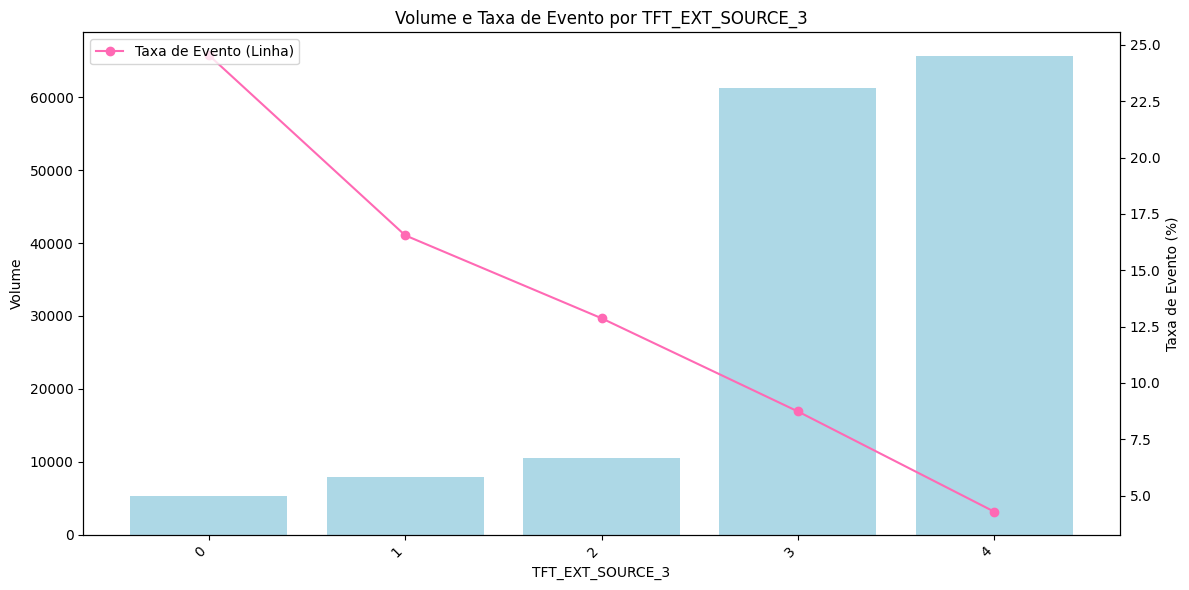

In [ ]:
result = analyze_variable(abt_treino_18, 'TFT_EXT_SOURCE_3', 'TARGET')

In [ ]:
result

,TFT_EXT_SOURCE_3,Taxa_de_Evento,Volume
0,0,0.245427,5358
1,1,0.165486,7904
2,2,0.128703,10497
3,3,0.087352,61269
4,4,0.042878,65651


**Analisando a variável ORGANIZATION_TYPE**

In [ ]:
result = categorize_with_decision_tree(abt_treino_18, n_categories=5, target='TARGET', numeric_var='ORGANIZATION_TYPE')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
3,7,0.090225,44267,-inf,5.0
4,8,0.117940,3417,6.0,7.0
2,6,0.072773,44055,8.0,41.0
1,4,0.097740,31195,42.0,55.0
0,2,0.053667,27745,56.0,inf


In [ ]:
abt_treino_19 = apply_tree_bins(abt_treino_18, result, numeric_var='ORGANIZATION_TYPE')
abt_treino_19.head()

,APP_GOODS_CREDIT_RATIO,APP_NEW_PAYMENT_RATE,EXT_SOURCE_1,TARGET,NAME_CONTRACT_TYPE,TFB_EMERGENCYSTATE_MODE,TFB_FONDKAPREMONT_MODE,TFB_HOUSETYPE_MODE,TFB_NAME_EDUCATION_TYPE,TFB_NAME_FAMILY_STATUS,TFB_NAME_INCOME_TYPE,TFB_OCCUPATION_TYPE,TFT_EXT_SOURCE_2,TFT_EXT_SOURCE_3,TFT_ORGANIZATION_TYPE
0,0.926613,0.056022,0.503186,0,Cash loans,No,POD_VERIFICAR,block of flats,Lower secondary,Civil marriage,Student,Waiters/barmen staff,2,3,1
1,0.703037,0.048840,0.495899,1,Cash loans,Yes,POD_VERIFICAR,POD_VERIFICAR,Higher education,Married,Student,Waiters/barmen staff,3,2,0
2,0.863260,0.078600,0.352115,0,Cash loans,No,POD_VERIFICAR,block of flats,Higher education,Civil marriage,Student,Waiters/barmen staff,2,4,3
3,0.893815,0.048105,0.398403,0,Cash loans,No,org spec account,block of flats,Higher education,Married,Student,Accountants,2,3,2
4,0.863260,0.048360,0.244596,1,Cash loans,No,POD_VERIFICAR,terraced house,Lower secondary,Married,Student,Accountants,2,4,3


In [ ]:
abt_teste_19 = apply_tree_bins(abt_teste_18, result, numeric_var='ORGANIZATION_TYPE')

In [ ]:
abt_treino_19.TFT_ORGANIZATION_TYPE.unique()

array([1, 0, 3, 2, 4])

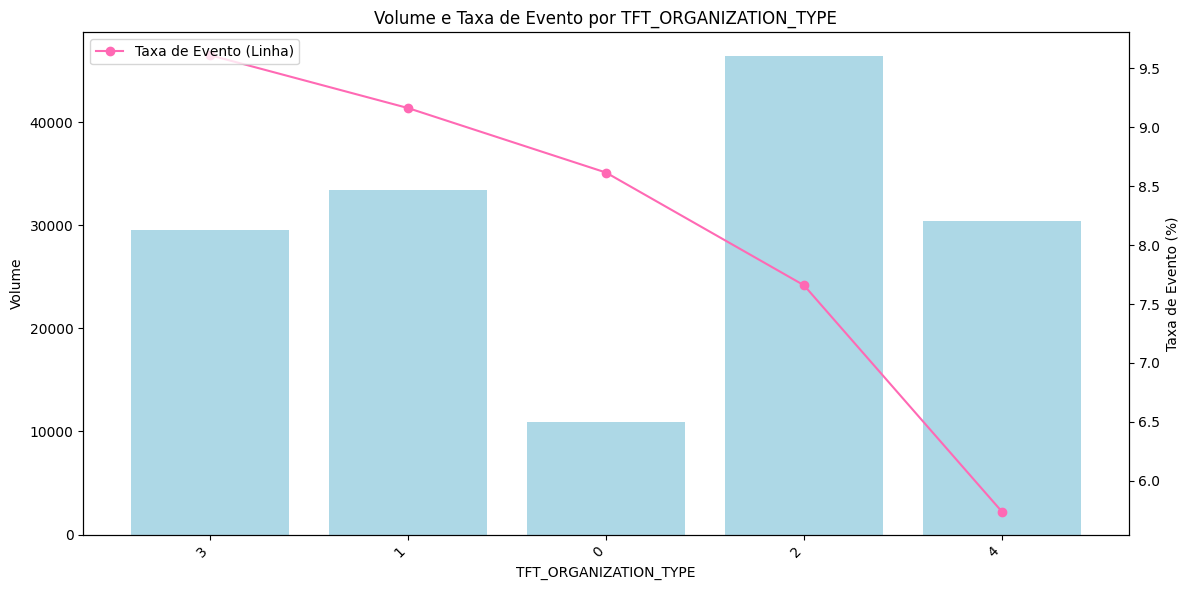

In [ ]:
result = analyze_variable(abt_treino_19, 'TFT_ORGANIZATION_TYPE', 'TARGET')

In [ ]:
result

,TFT_ORGANIZATION_TYPE,Taxa_de_Evento,Volume
3,3,0.096114,29517
1,1,0.091629,33461
0,0,0.086156,10922
2,2,0.076592,46402
4,4,0.057379,30377


**Agrupando a variável TFT_ORGANIZATION_TYPE**

In [ ]:
# Gerando o dicionário de domínios.
unique_values = abt_treino_19['TFT_ORGANIZATION_TYPE'].unique()
domain_map = {value: value for value in unique_values}

print("domain_map = {")
for key, value in domain_map.items():
    print(f"               '{key}': '{value}',")
print("              }")

domain_map = {
               '1': '1',
               '0': '0',
               '3': '3',
               '2': '2',
               '4': '4',
              }


In [ ]:
# Ajustando manualmente os agrupamentos de domínios

domain_map = {
               '1': '3',
               '0': '2',
               '3': '3',
               '2': '2',
               '4': '4',
              }

In [ ]:
# Aplicando a transformação e gerando dataframe 'transformation' com as mudanças de domínios
transformation = group_and_plot_by_safra2(abt_treino_19, 'TARGET', 'TFT_ORGANIZATION_TYPE', domain_map)


# Aplicando as transformações e (criando novas tabelas)

# Aplica nos dados de treino
abt_treino_20 = apply_grouping(abt_treino_19, transformation, 'TFT_ORGANIZATION_TYPE')

# Aplica nos dados de teste
abt_teste_20 = apply_grouping(abt_teste_19, transformation, 'TFT_ORGANIZATION_TYPE')

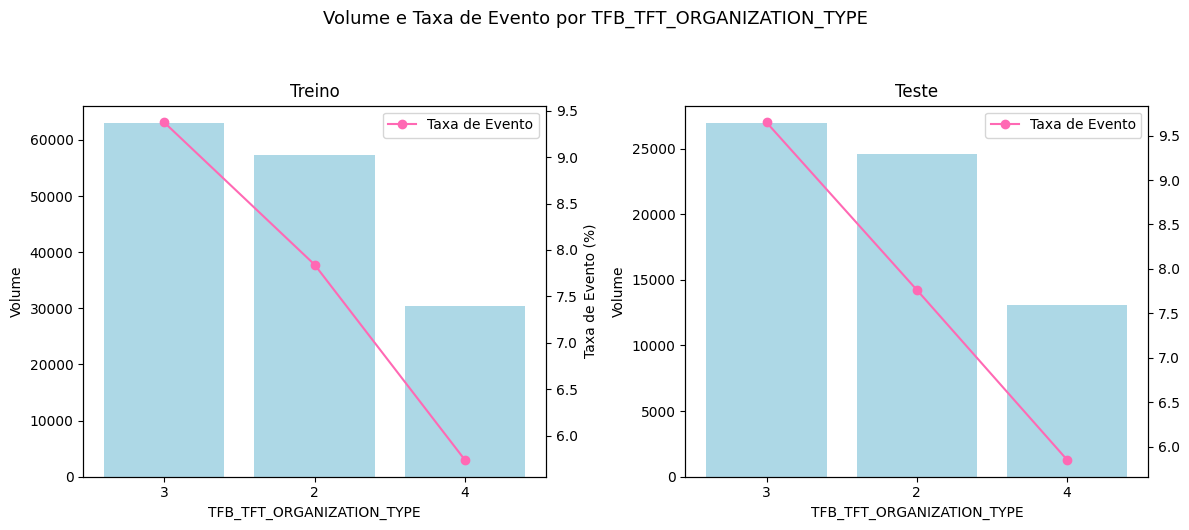

In [ ]:
# Visualizando a ordenação nos dados de treino e test (usar prefixo TFB_ no nome da variável).
result = analyze_variable_train_and_test(abt_treino_20, abt_teste_20, 'TFB_TFT_ORGANIZATION_TYPE', 'TARGET')

**Analisando a variável APP_NEW_PAYMENT_RATE**

In [ ]:
result = categorize_with_decision_tree(abt_treino_20, n_categories=5, target='TARGET', numeric_var='APP_NEW_PAYMENT_RATE')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
0,1,0.062653,61003,-inf,0.046594
1,3,0.145689,12664,0.046597,0.049800
3,7,0.083587,53501,0.049817,0.078814
4,8,0.162886,7318,0.078820,0.092474
2,6,0.050022,16193,0.092486,inf


In [ ]:
abt_treino_21 = apply_tree_bins(abt_treino_20, result, numeric_var='APP_NEW_PAYMENT_RATE')
abt_treino_21.head()

,APP_GOODS_CREDIT_RATIO,EXT_SOURCE_1,TARGET,NAME_CONTRACT_TYPE,TFB_EMERGENCYSTATE_MODE,TFB_FONDKAPREMONT_MODE,TFB_HOUSETYPE_MODE,TFB_NAME_EDUCATION_TYPE,TFB_NAME_FAMILY_STATUS,TFB_NAME_INCOME_TYPE,TFB_OCCUPATION_TYPE,TFT_EXT_SOURCE_2,TFT_EXT_SOURCE_3,TFB_TFT_ORGANIZATION_TYPE,TFT_APP_NEW_PAYMENT_RATE
0,0.926613,0.503186,0,Cash loans,No,POD_VERIFICAR,block of flats,Lower secondary,Civil marriage,Student,Waiters/barmen staff,2,3,3,2
1,0.703037,0.495899,1,Cash loans,Yes,POD_VERIFICAR,POD_VERIFICAR,Higher education,Married,Student,Waiters/barmen staff,3,2,2,1
2,0.863260,0.352115,0,Cash loans,No,POD_VERIFICAR,block of flats,Higher education,Civil marriage,Student,Waiters/barmen staff,2,4,3,2
3,0.893815,0.398403,0,Cash loans,No,org spec account,block of flats,Higher education,Married,Student,Accountants,2,3,2,1
4,0.863260,0.244596,1,Cash loans,No,POD_VERIFICAR,terraced house,Lower secondary,Married,Student,Accountants,2,4,3,1


In [ ]:
abt_teste_21 = apply_tree_bins(abt_teste_20, result, numeric_var='APP_NEW_PAYMENT_RATE')

In [ ]:
abt_treino_21.TFT_APP_NEW_PAYMENT_RATE.unique()

array([2, 1, 0, 4, 3])

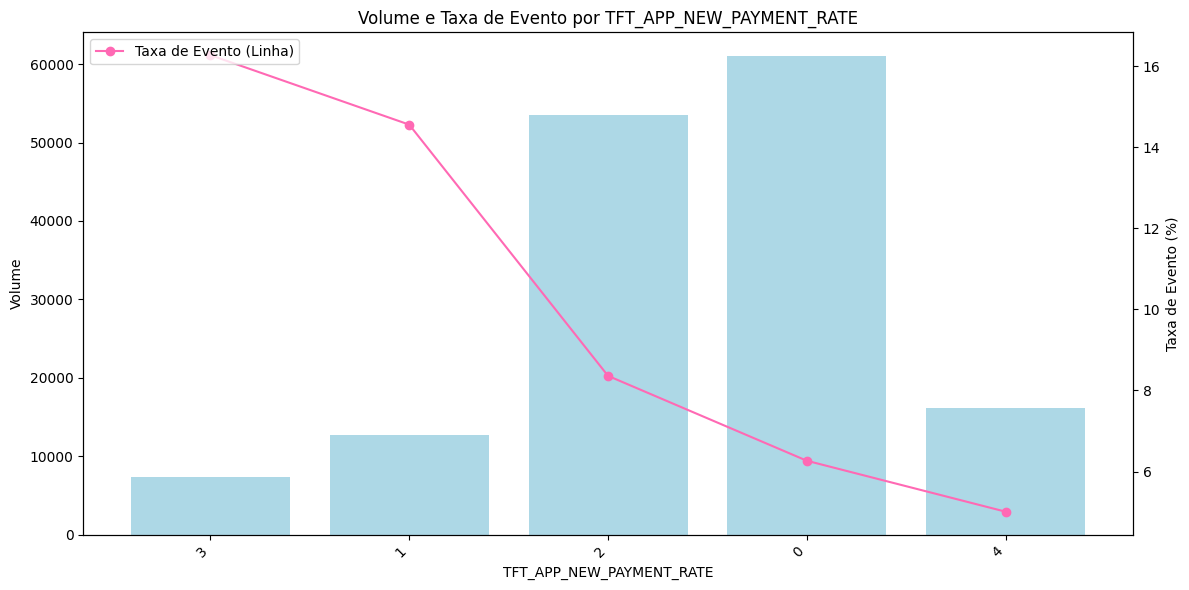

In [ ]:
result = analyze_variable(abt_treino_21, 'TFT_APP_NEW_PAYMENT_RATE', 'TARGET')

In [ ]:
result

,TFT_APP_NEW_PAYMENT_RATE,Taxa_de_Evento,Volume
3,3,0.162772,7317
1,1,0.145621,12663
2,2,0.083604,53502
0,0,0.062654,61002
4,4,0.050077,16195


**Analisando a variável EXT_SOURCE_1**

In [ ]:
result = categorize_with_decision_tree(abt_treino_21, n_categories=5, target='TARGET', numeric_var='EXT_SOURCE_1')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
3,7,0.419355,124,-inf,0.044442
4,8,0.219512,1476,0.044564,0.120643
2,6,0.140167,8975,0.120656,0.265383
0,3,0.083626,112859,0.265388,0.565590
1,4,0.039237,27245,0.565609,inf


In [ ]:
abt_treino_22 = apply_tree_bins(abt_treino_21, result, numeric_var='EXT_SOURCE_1')
abt_treino_22.head()

,APP_GOODS_CREDIT_RATIO,TARGET,NAME_CONTRACT_TYPE,TFB_EMERGENCYSTATE_MODE,TFB_FONDKAPREMONT_MODE,TFB_HOUSETYPE_MODE,TFB_NAME_EDUCATION_TYPE,TFB_NAME_FAMILY_STATUS,TFB_NAME_INCOME_TYPE,TFB_OCCUPATION_TYPE,TFT_EXT_SOURCE_2,TFT_EXT_SOURCE_3,TFB_TFT_ORGANIZATION_TYPE,TFT_APP_NEW_PAYMENT_RATE,TFT_EXT_SOURCE_1
0,0.926613,0,Cash loans,No,POD_VERIFICAR,block of flats,Lower secondary,Civil marriage,Student,Waiters/barmen staff,2,3,3,2,3
1,0.703037,1,Cash loans,Yes,POD_VERIFICAR,POD_VERIFICAR,Higher education,Married,Student,Waiters/barmen staff,3,2,2,1,3
2,0.863260,0,Cash loans,No,POD_VERIFICAR,block of flats,Higher education,Civil marriage,Student,Waiters/barmen staff,2,4,3,2,3
3,0.893815,0,Cash loans,No,org spec account,block of flats,Higher education,Married,Student,Accountants,2,3,2,1,3
4,0.863260,1,Cash loans,No,POD_VERIFICAR,terraced house,Lower secondary,Married,Student,Accountants,2,4,3,1,2


In [ ]:
abt_teste_22 = apply_tree_bins(abt_teste_21, result, numeric_var='EXT_SOURCE_1')

In [ ]:
abt_treino_22.TFT_EXT_SOURCE_1.unique()

array([3, 2, 4, 1, 0])

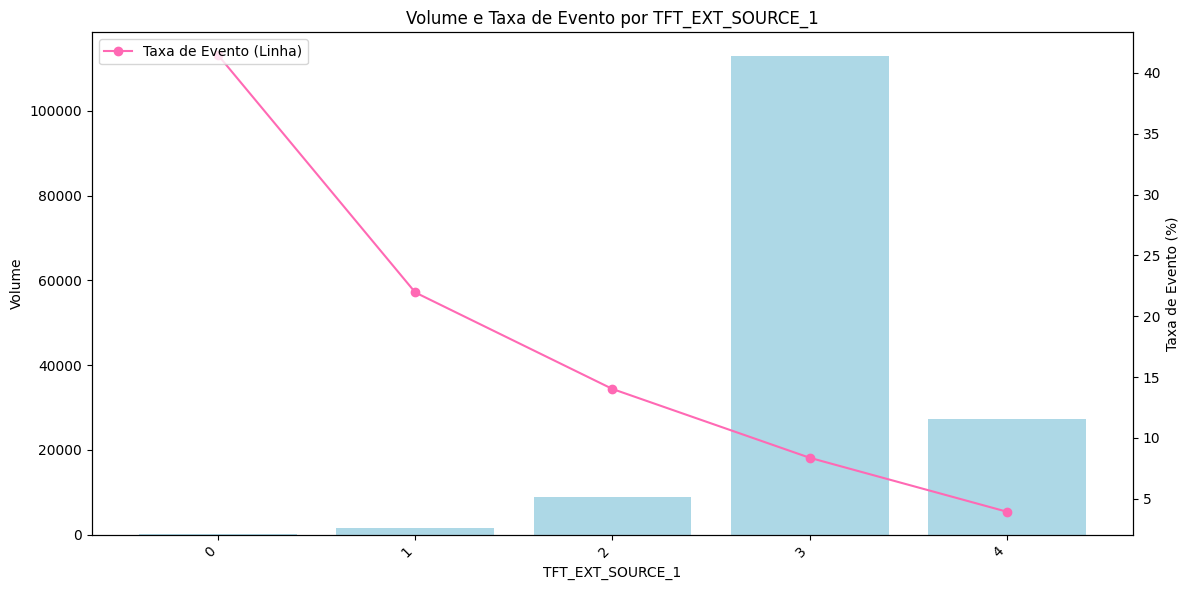

In [ ]:
result = analyze_variable(abt_treino_22, 'TFT_EXT_SOURCE_1', 'TARGET')

In [ ]:
result

,TFT_EXT_SOURCE_1,Taxa_de_Evento,Volume
0,0,0.414634,123
1,1,0.219512,1476
2,2,0.140167,8975
3,3,0.083626,112859
4,4,0.039272,27246


**Analisando a variável APP_GOODS_CREDIT_RATIO**

In [ ]:
result = categorize_with_decision_tree(abt_treino_22, n_categories=5, target='TARGET', numeric_var='APP_GOODS_CREDIT_RATIO')
result

,Leaf,Taxa_de_Evento,Volume,Lower_Bound,Upper_Bound
3,7,0.115340,1734,-inf,0.703035
4,8,0.175743,2424,0.703035,0.703041
2,6,0.112460,26863,0.703041,0.825630
0,3,0.088877,22818,0.825630,0.863260
1,4,0.066770,96840,0.863260,inf


In [ ]:
abt_treino_23 = apply_tree_bins(abt_treino_22, result, numeric_var='APP_GOODS_CREDIT_RATIO')
abt_treino_23.head()

,TARGET,NAME_CONTRACT_TYPE,TFB_EMERGENCYSTATE_MODE,TFB_FONDKAPREMONT_MODE,TFB_HOUSETYPE_MODE,TFB_NAME_EDUCATION_TYPE,TFB_NAME_FAMILY_STATUS,TFB_NAME_INCOME_TYPE,TFB_OCCUPATION_TYPE,TFT_EXT_SOURCE_2,TFT_EXT_SOURCE_3,TFB_TFT_ORGANIZATION_TYPE,TFT_APP_NEW_PAYMENT_RATE,TFT_EXT_SOURCE_1,TFT_APP_GOODS_CREDIT_RATIO
0,0,Cash loans,No,POD_VERIFICAR,block of flats,Lower secondary,Civil marriage,Student,Waiters/barmen staff,2,3,3,2,3,4
1,1,Cash loans,Yes,POD_VERIFICAR,POD_VERIFICAR,Higher education,Married,Student,Waiters/barmen staff,3,2,2,1,3,1
2,0,Cash loans,No,POD_VERIFICAR,block of flats,Higher education,Civil marriage,Student,Waiters/barmen staff,2,4,3,2,3,4
3,0,Cash loans,No,org spec account,block of flats,Higher education,Married,Student,Accountants,2,3,2,1,3,4
4,1,Cash loans,No,POD_VERIFICAR,terraced house,Lower secondary,Married,Student,Accountants,2,4,3,1,2,4


In [ ]:
abt_teste_23 = apply_tree_bins(abt_teste_22, result, numeric_var='APP_GOODS_CREDIT_RATIO')

In [ ]:
abt_treino_23.TFT_APP_GOODS_CREDIT_RATIO.unique()

array([4, 1, 2, 3, 0])

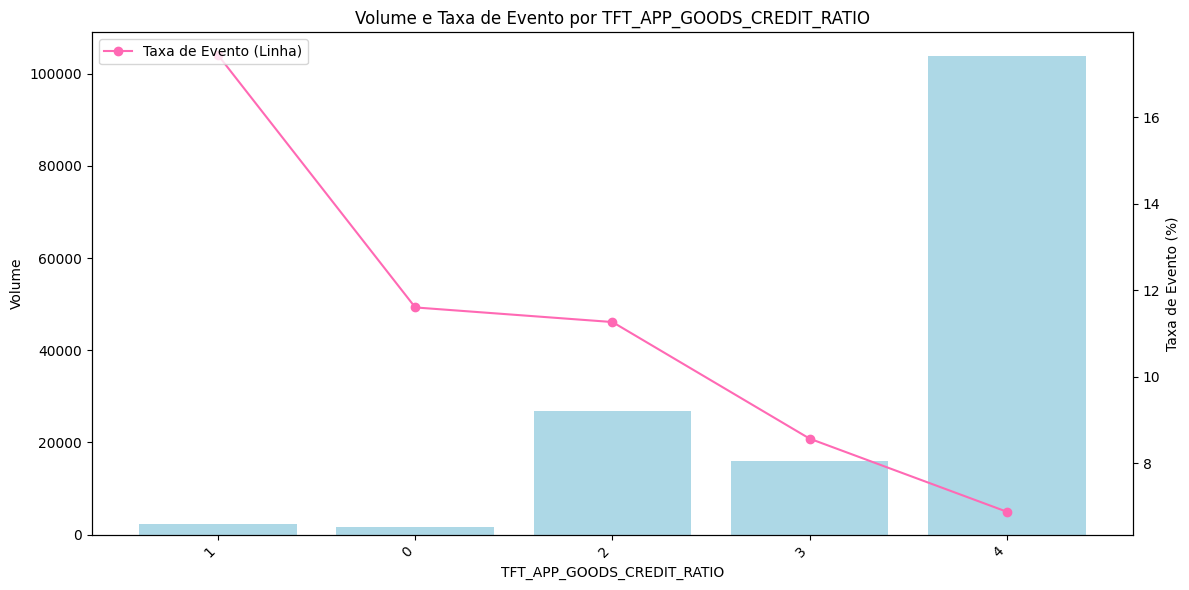

In [ ]:
result = analyze_variable(abt_treino_23, 'TFT_APP_GOODS_CREDIT_RATIO', 'TARGET')

In [ ]:
result

,TFT_APP_GOODS_CREDIT_RATIO,Taxa_de_Evento,Volume
1,1,0.174404,2391
0,0,0.116019,1698
2,2,0.112639,26909
3,3,0.085655,15901
4,4,0.068742,103780


**Agrupando a variável TFT_APP_GOODS_CREDIT_RATIO**

In [ ]:
# Gerando o dicionário de domínios.
unique_values = abt_treino_23['TFT_APP_GOODS_CREDIT_RATIO'].unique()
domain_map = {value: value for value in unique_values}

print("domain_map = {")
for key, value in domain_map.items():
    print(f"               '{key}': '{value}',")
print("              }")

domain_map = {
               '4': '4',
               '1': '1',
               '2': '2',
               '3': '3',
               '0': '0',
              }


In [ ]:
# Ajustando manualmente os agrupamentos de domínios

domain_map = {
               '4': '4',
               '1': '1',
               '2': '0',
               '3': '3',
               '0': '0',
              }

In [ ]:
# Aplicando a transformação e gerando dataframe 'transformation' com as mudanças de domínios
transformation = group_and_plot_by_safra2(abt_treino_23, 'TARGET', 'TFT_APP_GOODS_CREDIT_RATIO', domain_map)


# Aplicando as transformações e (criando novas tabelas)

# Aplica nos dados de treino
abt_treino_24 = apply_grouping(abt_treino_23, transformation, 'TFT_APP_GOODS_CREDIT_RATIO')

# Aplica nos dados de teste
abt_teste_24 = apply_grouping(abt_teste_23, transformation, 'TFT_APP_GOODS_CREDIT_RATIO')

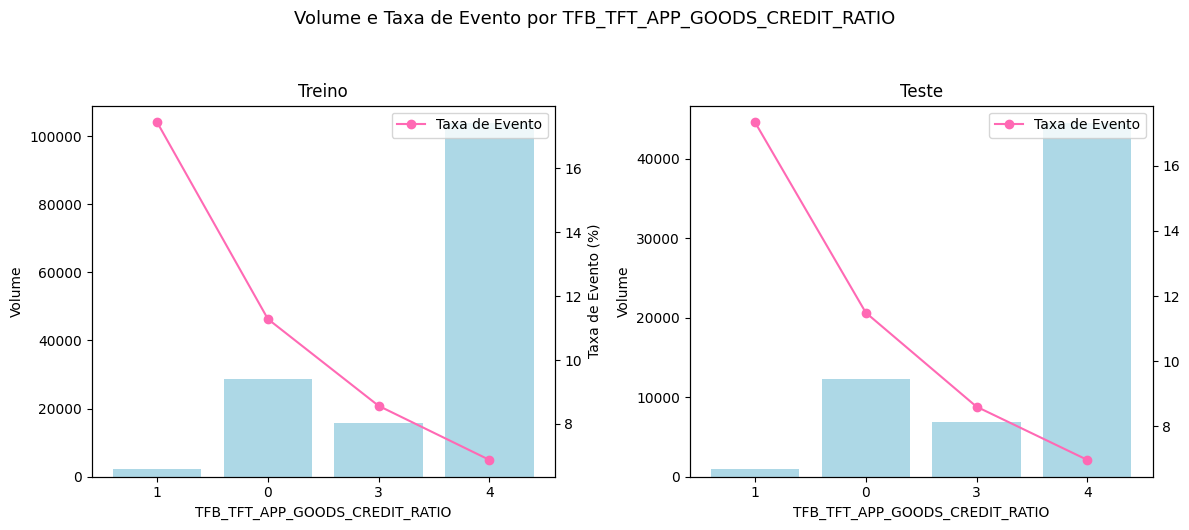

In [ ]:
# Visualizando a ordenação nos dados de treino e test (usar prefixo TFB_ no nome da variável).
result = analyze_variable_train_and_test(abt_treino_24, abt_teste_24, 'TFB_TFT_APP_GOODS_CREDIT_RATIO', 'TARGET')

### **Salvar tabelas categorizadas**

In [ ]:
abt_treino_24.to_csv('/content/drive/MyDrive/CREDIT_SCORING_SQUAD8/3_modelagem/Modelo_Regressao_Logistica/wagner/v18_fe_application_01/abt_categ_vars_treino.csv')

In [ ]:
abt_teste_24.to_csv('/content/drive/MyDrive/CREDIT_SCORING_SQUAD8/3_modelagem/Modelo_Regressao_Logistica/wagner/v18_fe_application_01/abt_categ_vars_teste.csv')

<br>

## **Criação das variáveis Dummies**

In [ ]:
# Lendo a tabela de treino.
abt_treino_00 = pd.read_csv('/content/drive/MyDrive/CREDIT_SCORING_SQUAD8/3_modelagem/Modelo_Regressao_Logistica/wagner/v18_fe_application_01/abt_categ_vars_treino.csv')
abt_treino_00.drop(axis=1,columns=['Unnamed: 0'],inplace=True)
abt_treino_00.shape

(150679, 15)

In [ ]:
# Lendo a tabela de teste.
abt_teste_00 = pd.read_csv('/content/drive/MyDrive/CREDIT_SCORING_SQUAD8/3_modelagem/Modelo_Regressao_Logistica/wagner/v18_fe_application_01/abt_categ_vars_teste.csv')
abt_teste_00.drop(axis=1,columns=['Unnamed: 0'],inplace=True)
abt_teste_00.shape

(64578, 15)

In [ ]:
abt_treino_00.head()

,TARGET,NAME_CONTRACT_TYPE,TFB_EMERGENCYSTATE_MODE,TFB_FONDKAPREMONT_MODE,TFB_HOUSETYPE_MODE,TFB_NAME_EDUCATION_TYPE,TFB_NAME_FAMILY_STATUS,TFB_NAME_INCOME_TYPE,TFB_OCCUPATION_TYPE,TFT_EXT_SOURCE_2,TFT_EXT_SOURCE_3,TFB_TFT_ORGANIZATION_TYPE,TFT_APP_NEW_PAYMENT_RATE,TFT_EXT_SOURCE_1,TFB_TFT_APP_GOODS_CREDIT_RATIO
0,0,Cash loans,No,POD_VERIFICAR,block of flats,Lower secondary,Civil marriage,Student,Waiters/barmen staff,2,3,3,2,3,4
1,1,Cash loans,Yes,POD_VERIFICAR,POD_VERIFICAR,Higher education,Married,Student,Waiters/barmen staff,3,2,2,1,3,1
2,0,Cash loans,No,POD_VERIFICAR,block of flats,Higher education,Civil marriage,Student,Waiters/barmen staff,2,4,3,2,3,4
3,0,Cash loans,No,org spec account,block of flats,Higher education,Married,Student,Accountants,2,3,2,1,3,4
4,1,Cash loans,No,POD_VERIFICAR,terraced house,Lower secondary,Married,Student,Accountants,2,4,3,1,2,4


In [ ]:
# Dropando colunas.
X = abt_treino_00.drop(axis=1,columns=['TARGET'])

# Criando uma lista.
lista_onehot = list(X.columns)
print('Lista de vars para OneHot Encoding: ', lista_onehot)

# Instanciando o encoder.
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Aplicando o one-hot encoding.
encoded_data = encoder.fit_transform(abt_treino_00[lista_onehot])
encoded_cols = encoder.get_feature_names_out(lista_onehot)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=abt_treino_00.index)

abt_treino_01 = pd.concat([abt_treino_00.drop(lista_onehot, axis=1), encoded_df], axis=1)

# Salva o encoder e a lista de colunas em um arquivo .pkl.
data_to_serialize = {
    'encoder': encoder,
    'columns': lista_onehot
}

with open('/content/drive/MyDrive/CREDIT_SCORING_SQUAD8/3_modelagem/Modelo_Regressao_Logistica/wagner/v18_fe_application_01/artefatos/prd_onehotenc_2.pkl', 'wb') as f:
    pickle.dump(data_to_serialize, f)

Lista de vars para OneHot Encoding:  ['NAME_CONTRACT_TYPE', 'TFB_EMERGENCYSTATE_MODE', 'TFB_FONDKAPREMONT_MODE', 'TFB_HOUSETYPE_MODE', 'TFB_NAME_EDUCATION_TYPE', 'TFB_NAME_FAMILY_STATUS', 'TFB_NAME_INCOME_TYPE', 'TFB_OCCUPATION_TYPE', 'TFT_EXT_SOURCE_2', 'TFT_EXT_SOURCE_3', 'TFB_TFT_ORGANIZATION_TYPE', 'TFT_APP_NEW_PAYMENT_RATE', 'TFT_EXT_SOURCE_1', 'TFB_TFT_APP_GOODS_CREDIT_RATIO']


In [ ]:
abt_treino_01.shape

(150679, 35)

In [ ]:
abt_treino_01.head()

,TARGET,NAME_CONTRACT_TYPE_Revolving loans,TFB_EMERGENCYSTATE_MODE_Yes,TFB_FONDKAPREMONT_MODE_org spec account,TFB_HOUSETYPE_MODE_block of flats,TFB_HOUSETYPE_MODE_terraced house,TFB_NAME_EDUCATION_TYPE_Higher education,TFB_NAME_EDUCATION_TYPE_Lower secondary,TFB_NAME_FAMILY_STATUS_Married,TFB_NAME_FAMILY_STATUS_Widow,...,TFT_APP_NEW_PAYMENT_RATE_2,TFT_APP_NEW_PAYMENT_RATE_3,TFT_APP_NEW_PAYMENT_RATE_4,TFT_EXT_SOURCE_1_1,TFT_EXT_SOURCE_1_2,TFT_EXT_SOURCE_1_3,TFT_EXT_SOURCE_1_4,TFB_TFT_APP_GOODS_CREDIT_RATIO_1,TFB_TFT_APP_GOODS_CREDIT_RATIO_3,TFB_TFT_APP_GOODS_CREDIT_RATIO_4
0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Carregar o encoder e a lista de colunas.
with open('/content/drive/MyDrive/CREDIT_SCORING_SQUAD8/3_modelagem/Modelo_Regressao_Logistica/wagner/v18_fe_application_01/artefatos/prd_onehotenc_2.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_encoder = loaded_data['encoder']
loaded_columns = loaded_data['columns']

# Aplicando na base de teste.
encoded_data_test = loaded_encoder.transform(abt_teste_00[loaded_columns])
encoded_cols_test = loaded_encoder.get_feature_names_out(loaded_columns)
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoded_cols_test, index=abt_teste_00.index)

abt_teste_01 = pd.concat([abt_teste_00.drop(loaded_columns, axis=1), encoded_df_test], axis=1)

abt_teste_01.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(64578, 35)

In [ ]:
abt_teste_01.head()

,TARGET,NAME_CONTRACT_TYPE_Revolving loans,TFB_EMERGENCYSTATE_MODE_Yes,TFB_FONDKAPREMONT_MODE_org spec account,TFB_HOUSETYPE_MODE_block of flats,TFB_HOUSETYPE_MODE_terraced house,TFB_NAME_EDUCATION_TYPE_Higher education,TFB_NAME_EDUCATION_TYPE_Lower secondary,TFB_NAME_FAMILY_STATUS_Married,TFB_NAME_FAMILY_STATUS_Widow,...,TFT_APP_NEW_PAYMENT_RATE_2,TFT_APP_NEW_PAYMENT_RATE_3,TFT_APP_NEW_PAYMENT_RATE_4,TFT_EXT_SOURCE_1_1,TFT_EXT_SOURCE_1_2,TFT_EXT_SOURCE_1_3,TFT_EXT_SOURCE_1_4,TFB_TFT_APP_GOODS_CREDIT_RATIO_1,TFB_TFT_APP_GOODS_CREDIT_RATIO_3,TFB_TFT_APP_GOODS_CREDIT_RATIO_4
0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### **Verificando a matriz de correlação das variáveis dummificadas**

In [ ]:
# Dropando as colunas de Target.
abt_treino_02 = abt_treino_01.drop(axis=1,columns=['TARGET'],inplace=False)

# Calculando a correlação de Pearson.
corr_matrix_2 = abt_treino_02.corr()

corr_matrix_2

,NAME_CONTRACT_TYPE_Revolving loans,TFB_EMERGENCYSTATE_MODE_Yes,TFB_FONDKAPREMONT_MODE_org spec account,TFB_HOUSETYPE_MODE_block of flats,TFB_HOUSETYPE_MODE_terraced house,TFB_NAME_EDUCATION_TYPE_Higher education,TFB_NAME_EDUCATION_TYPE_Lower secondary,TFB_NAME_FAMILY_STATUS_Married,TFB_NAME_FAMILY_STATUS_Widow,TFB_NAME_INCOME_TYPE_Student,...,TFT_APP_NEW_PAYMENT_RATE_2,TFT_APP_NEW_PAYMENT_RATE_3,TFT_APP_NEW_PAYMENT_RATE_4,TFT_EXT_SOURCE_1_1,TFT_EXT_SOURCE_1_2,TFT_EXT_SOURCE_1_3,TFT_EXT_SOURCE_1_4,TFB_TFT_APP_GOODS_CREDIT_RATIO_1,TFB_TFT_APP_GOODS_CREDIT_RATIO_3,TFB_TFT_APP_GOODS_CREDIT_RATIO_4
NAME_CONTRACT_TYPE_Revolving loans,1.000000,-0.028578,0.005798,0.028028,-0.001170,0.063608,-0.063657,-0.021964,-0.021519,-0.005806,...,0.437292,-0.073446,-0.111505,0.000438,0.013838,-0.014883,0.008072,-0.041281,-0.111592,0.217229
TFB_EMERGENCYSTATE_MODE_Yes,-0.028578,1.000000,-0.235925,-0.914520,-0.084973,-0.112565,0.112785,0.046246,-0.014181,-0.002354,...,-0.008637,0.018938,-0.012846,0.020151,0.023467,0.039789,-0.064955,0.012361,0.021536,-0.032016
TFB_FONDKAPREMONT_MODE_org spec account,0.005798,-0.235925,1.000000,0.245855,0.002433,0.039819,-0.039863,-0.010200,0.007302,0.002460,...,-0.000280,-0.004287,0.003044,-0.008575,-0.007996,-0.013164,0.022094,0.000684,-0.002150,-0.002569
TFB_HOUSETYPE_MODE_block of flats,0.028028,-0.914520,0.245855,1.000000,-0.092148,0.108421,-0.108598,-0.044731,0.013379,0.001770,...,0.007998,-0.017949,0.011403,-0.017966,-0.022034,-0.038967,0.062568,-0.013642,-0.021577,0.032375
TFB_HOUSETYPE_MODE_terraced house,-0.001170,-0.084973,0.002433,-0.092148,1.000000,-0.007163,0.006951,-0.012244,0.003455,0.000941,...,0.003536,0.001838,-0.003125,-0.000720,0.002089,0.001323,-0.002759,0.001104,-0.001396,-0.004598
TFB_NAME_EDUCATION_TYPE_Higher education,0.063608,-0.112565,0.039819,0.108421,-0.007163,1.000000,-0.998478,0.022500,-0.053941,-0.000498,...,0.007806,-0.018169,0.005525,-0.017061,-0.019404,-0.103229,0.132881,-0.021885,-0.033841,0.079924
TFB_NAME_EDUCATION_TYPE_Lower secondary,-0.063657,0.112785,-0.039863,-0.108598,0.006951,-0.998478,1.000000,-0.022523,0.053999,0.000484,...,-0.007826,0.018092,-0.005614,0.017178,0.019654,0.103208,-0.133044,0.022034,0.034064,-0.080277
TFB_NAME_FAMILY_STATUS_Married,-0.021964,0.046246,-0.010200,-0.044731,-0.012244,0.022500,-0.022523,1.000000,-0.361372,0.003721,...,-0.036247,-0.015852,-0.029620,-0.029299,-0.047101,-0.000629,0.037570,-0.018186,-0.003614,0.034008
TFB_NAME_FAMILY_STATUS_Widow,-0.021519,-0.014181,0.007302,0.013379,0.003455,-0.053941,0.053999,-0.361372,1.000000,-0.003644,...,-0.009074,-0.030901,0.022424,-0.022114,-0.052339,0.023399,0.011904,-0.000397,0.015447,-0.009144
TFB_NAME_INCOME_TYPE_Student,-0.005806,-0.002354,0.002460,0.001770,0.000941,-0.000498,0.000484,0.003721,-0.003644,1.000000,...,0.001843,0.002254,0.003463,0.000992,0.002511,-0.004242,0.002960,0.001267,0.003427,-0.006708


In [ ]:
# Definindo limiar de correlação.
limiar_corr = 0.85

# Criando uma máscara para correlações maior ou igual ao valor absoluto do limiar.
mask = np.triu(np.ones_like(corr_matrix_2, dtype=bool))
high_corr = corr_matrix_2.mask(mask).abs() >= limiar_corr

# Criando uma lista para armazenar as colunas a serem removidas.
vars_corr_to_drop = [column for column in high_corr.columns if any(high_corr[column])]

# Removendo as colunas da matriz de correlação.
abt_treino_03 = abt_treino_02.drop(abt_treino_02[vars_corr_to_drop], axis=1)

# Imprimindo variáveis dropadas.
print('Variáveis que serão excluídas por alta correlação: ', vars_corr_to_drop)

abt_treino_03.shape

Variáveis que serão excluídas por alta correlação:  ['TFB_EMERGENCYSTATE_MODE_Yes', 'TFB_NAME_EDUCATION_TYPE_Higher education', 'TFB_NAME_INCOME_TYPE_Student']


(150679, 31)

In [ ]:
# Salvando a lista de variáveis dropadas em um arquivo .pkl (artefato).
with open('/content/drive/MyDrive/CREDIT_SCORING_SQUAD8/3_modelagem/Modelo_Regressao_Logistica/wagner/v18_fe_application_01/artefatos/prd_drop_vars_corr.pkl', 'wb') as f:
    pickle.dump(vars_corr_to_drop, f)

In [ ]:
# Carregando o pkl com a lista de variáveis a serem removidas.
with open('/content/drive/MyDrive/CREDIT_SCORING_SQUAD8/3_modelagem/Modelo_Regressao_Logistica/wagner/v18_fe_application_01/artefatos/prd_drop_vars_corr.pkl', 'rb') as f:
    loaded_pkl_drop_vars_corr = pickle.load(f)

# Aplicando a remoção das variáveis na tabela de teste.
abt_teste_03 = abt_teste_01.drop(axis=1, columns=loaded_pkl_drop_vars_corr)

abt_teste_03.shape

(64578, 32)

### **Trazendo Target para tabela de treino**

In [ ]:
abt_treino_04 = abt_treino_03.merge(abt_treino_01[['TARGET']], left_index=True, right_index=True, how='inner')

abt_treino_04.head()

,NAME_CONTRACT_TYPE_Revolving loans,TFB_FONDKAPREMONT_MODE_org spec account,TFB_HOUSETYPE_MODE_block of flats,TFB_HOUSETYPE_MODE_terraced house,TFB_NAME_EDUCATION_TYPE_Lower secondary,TFB_NAME_FAMILY_STATUS_Married,TFB_NAME_FAMILY_STATUS_Widow,TFB_NAME_INCOME_TYPE_Unemployed,TFB_OCCUPATION_TYPE_Low-skill Laborers,TFB_OCCUPATION_TYPE_Waiters/barmen staff,...,TFT_APP_NEW_PAYMENT_RATE_3,TFT_APP_NEW_PAYMENT_RATE_4,TFT_EXT_SOURCE_1_1,TFT_EXT_SOURCE_1_2,TFT_EXT_SOURCE_1_3,TFT_EXT_SOURCE_1_4,TFB_TFT_APP_GOODS_CREDIT_RATIO_1,TFB_TFT_APP_GOODS_CREDIT_RATIO_3,TFB_TFT_APP_GOODS_CREDIT_RATIO_4,TARGET
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1


In [ ]:
abt_teste_04 = abt_teste_03

abt_teste_04.head()

,TARGET,NAME_CONTRACT_TYPE_Revolving loans,TFB_FONDKAPREMONT_MODE_org spec account,TFB_HOUSETYPE_MODE_block of flats,TFB_HOUSETYPE_MODE_terraced house,TFB_NAME_EDUCATION_TYPE_Lower secondary,TFB_NAME_FAMILY_STATUS_Married,TFB_NAME_FAMILY_STATUS_Widow,TFB_NAME_INCOME_TYPE_Unemployed,TFB_OCCUPATION_TYPE_Low-skill Laborers,...,TFT_APP_NEW_PAYMENT_RATE_2,TFT_APP_NEW_PAYMENT_RATE_3,TFT_APP_NEW_PAYMENT_RATE_4,TFT_EXT_SOURCE_1_1,TFT_EXT_SOURCE_1_2,TFT_EXT_SOURCE_1_3,TFT_EXT_SOURCE_1_4,TFB_TFT_APP_GOODS_CREDIT_RATIO_1,TFB_TFT_APP_GOODS_CREDIT_RATIO_3,TFB_TFT_APP_GOODS_CREDIT_RATIO_4
0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


<br>

## **Treinamento do Modelo (Regressão Logística)**

In [ ]:
X = abt_treino_04.drop(axis=1,columns=['TARGET'])

lista_features_rl = list(X.columns)
lista_features_rl

['NAME_CONTRACT_TYPE_Revolving loans',
 'TFB_FONDKAPREMONT_MODE_org spec account',
 'TFB_HOUSETYPE_MODE_block of flats',
 'TFB_HOUSETYPE_MODE_terraced house',
 'TFB_NAME_EDUCATION_TYPE_Lower secondary',
 'TFB_NAME_FAMILY_STATUS_Married',
 'TFB_NAME_FAMILY_STATUS_Widow',
 'TFB_NAME_INCOME_TYPE_Unemployed',
 'TFB_OCCUPATION_TYPE_Low-skill Laborers',
 'TFB_OCCUPATION_TYPE_Waiters/barmen staff',
 'TFT_EXT_SOURCE_2_1',
 'TFT_EXT_SOURCE_2_2',
 'TFT_EXT_SOURCE_2_3',
 'TFT_EXT_SOURCE_2_4',
 'TFT_EXT_SOURCE_3_1',
 'TFT_EXT_SOURCE_3_2',
 'TFT_EXT_SOURCE_3_3',
 'TFT_EXT_SOURCE_3_4',
 'TFB_TFT_ORGANIZATION_TYPE_3',
 'TFB_TFT_ORGANIZATION_TYPE_4',
 'TFT_APP_NEW_PAYMENT_RATE_1',
 'TFT_APP_NEW_PAYMENT_RATE_2',
 'TFT_APP_NEW_PAYMENT_RATE_3',
 'TFT_APP_NEW_PAYMENT_RATE_4',
 'TFT_EXT_SOURCE_1_1',
 'TFT_EXT_SOURCE_1_2',
 'TFT_EXT_SOURCE_1_3',
 'TFT_EXT_SOURCE_1_4',
 'TFB_TFT_APP_GOODS_CREDIT_RATIO_1',
 'TFB_TFT_APP_GOODS_CREDIT_RATIO_3',
 'TFB_TFT_APP_GOODS_CREDIT_RATIO_4']

In [ ]:
# Criando função para treinamento e criação do scorecard.
def logistic_regression_with_scorecard(data, target_var, features):
    # Adicionando uma constante ao dataset (intercepto).
    data = sm.add_constant(data)

    # Ajustando o modelo de regressão logística.
    model = sm.Logit(data[target_var], data[features + ['const']]).fit()
    #model = sm.Logit(data[target_var], data[features]).fit()

    # Coletando p-valores e estatísticas de Wald.
    summary = model.summary2().tables[1]
    summary['Wald'] = summary['z']**2
    scorecard = summary[['Coef.', 'P>|z|', 'Wald']]
    scorecard.columns = ['Beta Coefficient', 'P-Value', 'Wald Statistic']
    scorecard = scorecard.sort_values(by='Wald Statistic', ascending=False)

    return model, scorecard

In [ ]:
# Chamando a função.
model, scorecard = logistic_regression_with_scorecard(abt_treino_04, 'TARGET', lista_features_rl)
scorecard

Optimization terminated successfully.
         Current function value: 0.250566
         Iterations 7


,Beta Coefficient,P-Value,Wald Statistic
TFT_EXT_SOURCE_3_4,-1.683504,0.000000e+00,1872.799205
TFT_EXT_SOURCE_3_3,-1.091482,2.029122e-196,893.948688
TFT_EXT_SOURCE_2_4,-2.134006,7.237383e-104,468.374082
TFT_EXT_SOURCE_2_3,-1.688717,1.644895e-68,305.974651
TFT_APP_NEW_PAYMENT_RATE_3,0.625696,5.604240e-61,271.405834
TFT_EXT_SOURCE_3_2,-0.688872,4.149656e-53,235.307084
TFT_APP_NEW_PAYMENT_RATE_1,0.509126,4.468549e-52,230.573986
TFT_EXT_SOURCE_2_2,-1.202577,2.551761e-35,153.807308
TFB_OCCUPATION_TYPE_Waiters/barmen staff,0.252391,2.079027e-29,126.776649
NAME_CONTRACT_TYPE_Revolving loans,-0.441395,5.584129e-25,106.550844


In [ ]:
# Salvando o modelo treinado em um arquivo .pkl (artefato).
with open('/content/drive/MyDrive/CREDIT_SCORING_SQUAD8/3_modelagem/Modelo_Regressao_Logistica/wagner/v18_fe_application_01/artefatos/model_rl.pkl', 'wb') as file:
  pickle.dump(model, file)

In [ ]:
abt_treino_04.head()

,NAME_CONTRACT_TYPE_Revolving loans,TFB_FONDKAPREMONT_MODE_org spec account,TFB_HOUSETYPE_MODE_block of flats,TFB_HOUSETYPE_MODE_terraced house,TFB_NAME_EDUCATION_TYPE_Lower secondary,TFB_NAME_FAMILY_STATUS_Married,TFB_NAME_FAMILY_STATUS_Widow,TFB_NAME_INCOME_TYPE_Unemployed,TFB_OCCUPATION_TYPE_Low-skill Laborers,TFB_OCCUPATION_TYPE_Waiters/barmen staff,...,TFT_APP_NEW_PAYMENT_RATE_3,TFT_APP_NEW_PAYMENT_RATE_4,TFT_EXT_SOURCE_1_1,TFT_EXT_SOURCE_1_2,TFT_EXT_SOURCE_1_3,TFT_EXT_SOURCE_1_4,TFB_TFT_APP_GOODS_CREDIT_RATIO_1,TFB_TFT_APP_GOODS_CREDIT_RATIO_3,TFB_TFT_APP_GOODS_CREDIT_RATIO_4,TARGET
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1


In [ ]:
abt_treino_04['const'] = 1.0
abt_teste_04['const'] = 1.0

abt_treino_05 = abt_treino_04.drop(axis=1,columns=['TARGET'])
abt_teste_05 = abt_teste_04.drop(axis=1,columns=['TARGET'])

In [ ]:
abt_treino_05['Score_1'] = model.predict(abt_treino_05).round(4)
abt_teste_05['Score_1'] = model.predict(abt_teste_05).round(4)

abt_treino_05['Score_0'] = 1 - abt_treino_05['Score_1']
abt_teste_05['Score_0'] = 1 - abt_teste_05['Score_1']

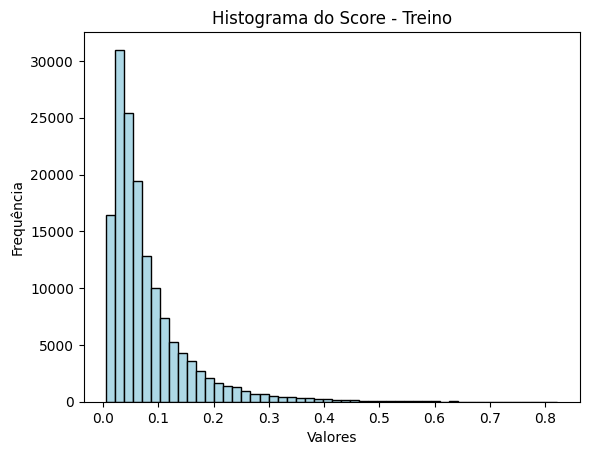

In [ ]:
# Plotando o histograma.
plt.hist(abt_treino_05.Score_1, color='lightblue', bins=50, edgecolor='black')
plt.title("Histograma do Score - Treino")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.show()

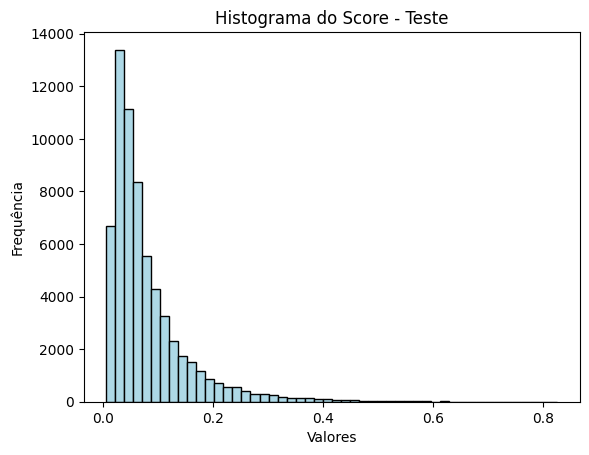

In [ ]:
# Plotando o histograma.
plt.hist(abt_teste_05.Score_1, color='lightblue', bins=50, edgecolor='black')
plt.title("Histograma do Score - Teste")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.show()

In [ ]:
# Trazer o target para a tabela.
abt_treino_06 = abt_treino_05.merge(abt_treino_04[['TARGET']], left_index=True, right_index=True, how='inner')
abt_teste_06 = abt_teste_05.merge(abt_teste_04[['TARGET']], left_index=True, right_index=True, how='inner')

In [ ]:
# Criando função para o cálculo das métricas e plotagem do gráfico.
def calculate_metrics(train_df, test_df, score_column, target_column,bins=10):
    def compute_metrics(df, score_column, target_column):
        df_sorted = df.sort_values(by=score_column, ascending=False)

        # Calcular KS.
        df_sorted['cum_good'] = (1 - df_sorted[target_column]).cumsum() / (1 - df_sorted[target_column]).sum()
        df_sorted['cum_bad'] = df_sorted[target_column].cumsum() / df_sorted[target_column].sum()
        df_sorted['ks'] = np.abs(df_sorted['cum_good'] - df_sorted['cum_bad'])
        ks_statistic = df_sorted['ks'].max()

        # Calcular AUC.
        auc_value = roc_auc_score(df_sorted[target_column], df_sorted[score_column])

        # Calcular Gini.
        gini = 2 * auc_value - 1

        # Dividir o score em 10 faixas.
        df_sorted['decile'] = pd.qcut(df_sorted[score_column], bins, labels=False)

        # Criar tabela detalhada.
        table = df_sorted.groupby('decile').agg(
            min_score=pd.NamedAgg(column=score_column, aggfunc='min'),
            max_score=pd.NamedAgg(column=score_column, aggfunc='max'),
            event_rate=pd.NamedAgg(column=target_column, aggfunc='mean'),
            volume=pd.NamedAgg(column=target_column, aggfunc='size')
        ).reset_index()

        return ks_statistic, auc_value, gini, table

    # Chamando a função para treino e teste.
    ks_train, auc_train, gini_train, table_train = compute_metrics(train_df, score_column, target_column)
    ks_test, auc_test, gini_test, table_test = compute_metrics(test_df, score_column, target_column)


    # Plotando o gráfico de barras para Event Rate por Decil.
    barWidth = 0.3
    r1 = np.arange(len(table_train))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, table_train['event_rate'], color='lightblue', width=barWidth, label='Train')
    plt.bar(r2, table_test['event_rate'], color='royalblue', width=barWidth, label='Test')

    plt.xlabel('Decile')
    plt.ylabel('Event Rate')
    plt.title('Event Rate by Decile')
    plt.xticks([r + barWidth for r in range(len(table_train))], table_train['decile'])
    plt.legend()
    plt.show()

    # Criando DataFrame para as métricas.
    metrics_df = pd.DataFrame({
        'Metric': ['KS', 'AUC', 'Gini'],
        'Train Value': [ks_train, auc_train, gini_train],
        'Test Value': [ks_test, auc_test, gini_test]
    })

    return metrics_df, table_train, table_test

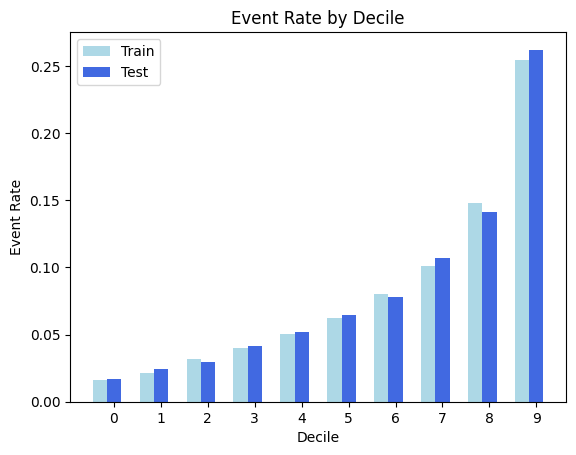

,Metric,Train Value,Test Value
0,KS,0.357759,0.354898
1,AUC,0.741269,0.739643
2,Gini,0.482537,0.479286


In [ ]:
# Chamando a função.
metrics, ord_score_train, ord_score_test = calculate_metrics(abt_treino_06, abt_teste_06, 'Score_1', 'TARGET', bins=10)
metrics

In [ ]:
ord_score_train

,decile,min_score,max_score,event_rate,volume
0,0,0.0057,0.0211,0.016360,15098
1,1,0.0212,0.0289,0.021725,15190
2,2,0.0290,0.0369,0.031550,14992
3,3,0.0370,0.0460,0.040040,15035
4,4,0.0461,0.0563,0.050541,15354
5,5,0.0564,0.0694,0.062588,14907
6,6,0.0695,0.0877,0.080412,15035
7,7,0.0878,0.1162,0.101192,14932
8,8,0.1163,0.1688,0.148178,15090
9,9,0.1689,0.8219,0.254154,15046


In [ ]:
X_train = abt_treino_04.drop(['TARGET'] , axis=1)
y_train = abt_treino_04['TARGET'].values

X_test = abt_teste_04.drop(['TARGET'] , axis=1)
y_test = abt_teste_04['TARGET'].values

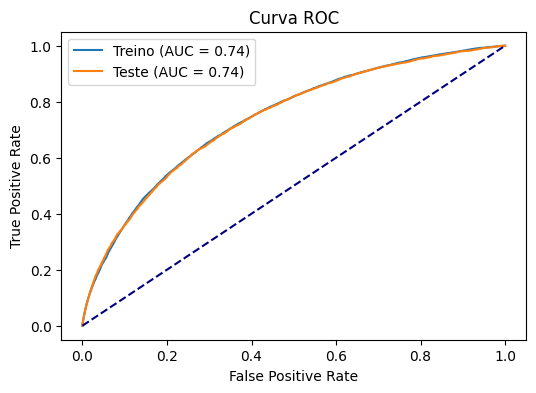

In [ ]:
# Curva ROC para Treino e Teste.
plt.subplots(figsize=(6,4))
for X, y, label in [(X_train, y_train, 'Treino'), (X_test, y_test, 'Teste')]:
    fpr, tpr, _ = roc_curve(y, model.predict(X))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [ ]:
def calculate_metrics(model_name, model, X_train, y_train, X_test, y_test):
    # Fazendo predições para treino e teste
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Obtendo probabilidades para cálculo de métricas AUC-ROC
    y_train_prob = model.predict(X_train)
    y_test_prob = model.predict(X_test)

    # Convertendo probabilidades para previsões binárias
    y_train_pred_binary = (y_train_prob > 0.5).astype(int)
    y_test_pred_binary = (y_test_prob > 0.5).astype(int)

    # Calculando as métricas para o conjunto de treino
    accuracy_train = accuracy_score(y_train, y_train_pred_binary)
    precision_train = precision_score(y_train, y_train_pred_binary)
    recall_train = recall_score(y_train, y_train_pred_binary)
    auc_roc_train = roc_auc_score(y_train, y_train_prob)

    # Calculando as métricas para o conjunto de teste
    accuracy_test = accuracy_score(y_test, y_test_pred_binary)
    precision_test = precision_score(y_test, y_test_pred_binary)
    recall_test = recall_score(y_test, y_test_pred_binary)
    auc_roc_test = roc_auc_score(y_test, y_test_prob)

    # Criando o DataFrame com as métricas calculadas
    metrics_df = pd.DataFrame({
        'Algoritmo': [model_name, model_name],
        'Conjunto': ['Treino', 'Teste'],
        'Acuracia': [accuracy_train, accuracy_test],
        'Precision': [precision_train, precision_test],
        'Recall': [recall_train, recall_test],
        'AUC_ROC': [auc_roc_train, auc_roc_test],
    })

    return metrics_df

In [ ]:
df_metrics_opt = calculate_metrics('Métricas', model, X_train, y_train, X_test, y_test)
df_metrics_opt

,Algoritmo,Conjunto,Acuracia,Precision,Recall,AUC_ROC
0,Métricas,Treino,0.919365,0.489260,0.016885,0.741269
1,Métricas,Teste,0.918269,0.479769,0.015747,0.739645


<br>

In [ ]:
def carteira_treino_rl(model, name_model, risk, X_train, y_train, prob_train):

    '''
    Esta função:
    - Faz as predições de probabilidade de evento e não-evento
      da base passada como parâmetro.
    - Separa os scores em 10 faixas.
    - Calcula a volumetria e a taxa de evento de cada faixa.
    - Gera uma linha horizontal que representa o apetite de
      risco assumido.
    - Analisa cada faixa e aplica cores diferentes nas
      barras de acordo com a taxa de evento da faixa
      e o apetite de risco assumido.
    - Calcula o percentual do público aprovado e
      não aprovado, de acordo com o apetitie de risco.

    Parâmetros:
      - model: modelo que ferá as predições
      - name_model: nome do modelo. Ex: "Random Forest"
      - risk: risco, em decimais, possível de ser assumido
             (geralmente igual a inadimplência da carteira)
      - X_train: base usada no treinamento do modelo
      - y_train: target usada no treinamento do modelo

    Retorno:
      - Faixas de limites superiores e inferiores de cada
        faixa de score. Esta faixa poderá ser passada como
        parâmetro na função "carteira_teste"
        para que os limites das faixas sejam mantidos.
    '''


    # -------------------------------------------------------------
    # Dados para teste da função
    # -------------------------------------------------------------

    # model = model_opt
    # name_model = 'Random Forest'
    # X_test = X_test_03
    # y_test = y_test_03
    # risk = 0.08


    # -------------------------------------------------------------
    # Criação do plot
    # -------------------------------------------------------------

    # Configura o plot
    fig, ax = plt.subplots(figsize=(12, 6))


    # -------------------------------------------------------------
    # Funções
    # -------------------------------------------------------------

    # Função para preencher as barras com cores diferentes
    def fill_bars(ax, values, color_above, color_below, threshold=None):
        for val, bar in zip(values, ax.patches):
            if threshold is not None:
                if val >= threshold:
                    bar.set_color(color_above)
                else:
                    bar.set_color(color_below)
            else:
                bar.set_color(color_above if val >= risk else color_below)



    # Função para adicionar a linha horizontal de risco no eixo secundário
    def add_risk_line(ax, risk_value, color='black'):

        # Adiciona a linha horizontal que representa o apetite de risco assumido
        ax.axhline(y=risk_value, color=color, linestyle='--')

        # Adicionar texto acima da linha
        texto_acima_linha = f'Risco: {100*risk_value:.1f}%'
        ax.text(0.5, risk_value+ 0.0025, texto_acima_linha)



    # Função para calcular as faixas (bins) e plotar o gráfico de barras dos dados de treino
    def plot_bar_chart(ax, probabilidades, y_real, title, color_default, color_above, color_below, risk_value=None):

        df = pd.DataFrame({'Probabilidades': probabilidades, 'Resposta Real': y_real})
        df = df.sort_values(by='Probabilidades', ascending=False)
        df['Deciles'] = pd.qcut(df['Probabilidades'], q=10, labels=False, duplicates='drop')


        #Volumetria das faixas
        df_vol = df.groupby('Deciles')['Deciles'].count().values


        # Extraindo o limite superior de score das faixas
        faixas=[]
        for i in range(0,10):
          if i != 9:
            faixas.append(round(1000*df.loc[df['Deciles']==i ,'Probabilidades'].max()  , 0))
          else:
            faixas.append( 1000 )

        # Criando uma lista com os rótulos de cada bin
        rotulos=[]
        for i in range(0, len(faixas)):
          if i == 0:
            rotulos.append(f'000 - {faixas[i]:.0f}')
          else:
            rotulos.append(f'{faixas[i-1]:.0f} - {faixas[i]:.0f}')

        # Agrupando os deciles e cálculando a média da propabilidade de evento em cada um
        decile_analysis = df.groupby('Deciles')['Resposta Real'].mean().reset_index()

        # Criação do eixo secundário
        ax2 = ax.twinx()

        # Plota as linhas para a taxa de evento em cada bin no eixo secundário
        ax2.plot(decile_analysis['Deciles'], decile_analysis['Resposta Real'], color='magenta', marker='o', label='Taxa de Evento')
        ax2.set_ylabel('Taxa de Evento')

        # Adiciona rótulos para a linha de taxa de evento
        for i, (x, y) in enumerate(zip(decile_analysis['Deciles'], decile_analysis['Resposta Real'])):
            ax2.annotate(f'{y:.2f}', xy=(x, y), xytext=(10, 10), textcoords='offset points',
                        ha='center', va='center', color='magenta')

        # Desligando o grid do gráfico secondário
        ax2.grid(False)


        # Plota as barras de volumetria com cores diferentes se a taxa de evento for superior ao risk_value
        for i, color in enumerate(['mistyrose', 'lightgreen'] * 5):
            ax.bar(i, df_vol[i], color=color if decile_analysis.loc[i, 'Resposta Real'] >= risk_value else color_default)

        # Configurações do gráfico
        ax.set_title(title, pad=10)
        ax.set_xlabel('Faixas de Score')
        ax.set_ylabel('Volumetria da faixa')
        ax.set_xticks(range(len(rotulos)))
        ax.set_ylim(0, 1.2 * np.max(df_vol)) #Valor maximo do eixo y igual a 20% do maior valor de volumetria
        ax.grid(False)


        # Configuração dos rótulos do eixo X para o gráfico
        ax.set_xticklabels(rotulos, rotation=0)

        # Adicionando linha horizontal que representa o risco no eixo secundário
        add_risk_line(ax2, risk_value)
        fill_bars(ax, decile_analysis['Resposta Real'], color_above, color_below, risk_value)

        #Lendo os deciles que estão abaixo da linha de risco
        faixas_aprovadas = decile_analysis.loc[decile_analysis['Resposta Real']<=risk_value , 'Deciles']
        faixas_reprovadas = decile_analysis.loc[decile_analysis['Resposta Real']>risk_value , 'Deciles']

        # Convertendo em lista as faixas aprovadas / reprovadas
        faixas_aprovadas = faixas_aprovadas.to_list()
        faixas_reprovadas = faixas_reprovadas.to_list()

        # Calculando a quantidade de pessoas aprovadas / reprovadas
        qtd_aprovadas = df.loc[df['Deciles'].isin(faixas_aprovadas) ,  'Deciles'].count()
        qtd_reprovadas = df.loc[df['Deciles'].isin(faixas_reprovadas), 'Deciles'].count()

        # Calculando o percentual de pessoas aprovadas / reprovadas
        perc_aprovadas = 100*round(qtd_aprovadas / df.shape[0]   , 2 )
        perc_reprovadas = 100*round(qtd_reprovadas / df.shape[0] , 2 )

        return perc_aprovadas , perc_reprovadas , color_above, color_below , faixas , df



    # -------------------------------------------------------------
    # Chamando a função de plot para dados de treino
    # -------------------------------------------------------------

    # Previsão das probabilidades no conjunto de treino
    # Probabilidade de NÃO-EVENTO (para inverter o gráfico)
    probabilidades_train = prob_train

    # Adiciona um pequeno ruído às probabilidades
    noise_train = np.random.uniform(0, 0.0001, size=probabilidades_train.shape)
    probabilidades_train += noise_train

    # Plota o gráfico de barras para o conjunto de treino
    perc_apr , perc_rep , color_above, color_below , faixas , df= plot_bar_chart(ax, probabilidades_train, y_train, 'Faixas de score, volumetrias e taxa de evento - base de treino ' + name_model,
                    'steelblue' , 'mistyrose', 'lightgreen', risk)

    # Criar entradas para a legenda com base nas cores
    legend_labels = [f'Aprovados:   {perc_apr}% da base', f'Reprovados: {perc_rep}% da base']
    legend_colors = [color_below, color_above]

    # Adicionar manualmente entradas para cada cor na legenda
    for label, color in zip(legend_labels, legend_colors):
        ax.bar(0, 0, color=color, label=label, linewidth=0)


    # Inserir legenda
    ax.legend( loc='upper left', bbox_to_anchor=(1.1, 1))



    plt.show()

    return faixas




def carteira_teste_rl(faixas, model, name_model, risk, X_test, y_test , prob_test):

    '''
    Esta função:
    - Faz as predições de probabilidade de evento e
      não-evento da base passada como parâmetro.
    - Separa os scores em 10 faixas.
    - Calcula a volumetria e a taxa de evento de
      cada faixa.
    - Gera uma linha horizontal que representa o
      apetite de risco assumido.
    - Analisa cada faixa e aplica cores diferentes
      nas barras de acordo com a taxa de evento da faixa
      e o apetite de risco assumido.
    - Calcula o percentual do público aprovado e
      não aprovado, de acordo com o apetitie de risco.

    Parâmetros:
      - faixas: lista de faixas gerada pela
        função "carteira_treino"
      - model: modelo que ferá as predições
      - name_model: nome do modelo. Ex: "Random Forest"
      - risk: risco, em decimais, possível de ser assumido
              (geralmente igual a inadimplência da carteira)
      - X_test: base usada para teste do modelo
      - y_test: target usada no para teste do modelo
    '''


    # -------------------------------------------------------------
    # Dados para teste da função
    # -------------------------------------------------------------


    # faixas = faixas
    # model = model_opt
    # name_model = 'Random Forest'
    # X_test = X_test_03
    # y_test = y_test_03
    # risk = 0.08


    # -------------------------------------------------------------
    # Criação do plot
    # -------------------------------------------------------------

    # Configura o plot
    fig, ax = plt.subplots(figsize=(12, 6))


    # -------------------------------------------------------------
    # Funções
    # -------------------------------------------------------------

    # Função para preencher as barras com cores diferentes
    def fill_bars(ax, values, color_above, color_below, threshold=None):
        for val, bar in zip(values, ax.patches):
            if threshold is not None:
                if val >= threshold:
                    bar.set_color(color_above)
                else:
                    bar.set_color(color_below)
            else:
                bar.set_color(color_above if val >= risk else color_below)



    # Função para adicionar a linha horizontal de risco no eixo secundário
    def add_risk_line(ax, risk_value, color='black'):

        # Adiciona a linha horizontal que representa o risco
        ax.axhline(y=risk_value, color=color, linestyle='--')

        # Adicionar texto acima da linha
        texto_acima_linha = f'Risco: {100*risk_value:.1f}%'
        ax.text(0.5, risk_value+ 0.0025, texto_acima_linha)



    # Função para aplicar as faixas (bins) e plotar o gráfico de barras dos dados de teste
    def apply_deciles_plot_bar_chart(faixas, ax, probabilidades, y_real, title, color_default, color_above, color_below, risk_value=None):

        df = pd.DataFrame({'Probabilidades': probabilidades, 'Resposta Real': y_real})
        df = df.sort_values(by='Probabilidades', ascending=False)

        # Ajustando os valores dos limites superiores e inferiores das faixas
        # que anteriormente tinham sido multiplicados por mil
        faixas = np.array(faixas)
        faixas=np.divide(faixas, 1000)
        faixas = faixas.tolist()

        # Adcionando o valor 0 no primeiro indice da lista de faixas
        faixas.insert(0, 0)

        # Aplica as faixas fornecidas
        df['Deciles'] = pd.cut(df['Probabilidades'], bins=faixas, labels=False, include_lowest=True)

        #Volumetria das faixas
        df_vol = df.groupby('Deciles')['Deciles'].count().values


        # Removendo novamente o valor Zero (que está no ídice Zero) para a lista ter
        # a mesma configuração do código anterior antes da extração dos rótulos
        faixas.pop(0)

        # Criando uma lista com os rótulos de cada bin, multiplicando por mil
        rotulos=[]
        for i in range(0, len(faixas)):
          if i == 0:
            rotulos.append(f'000 - {1000*faixas[i]:.0f}')
          else:
            rotulos.append(f'{1000*faixas[i-1]:.0f} - {1000*faixas[i]:.0f}')


        # Clculo da média de probabilidade de taxa de evento em cada bin
        decile_analysis = df.groupby('Deciles')['Resposta Real'].mean().reset_index()

        # Criação do eixo secundário
        ax2 = ax.twinx()

        # Plota as linhas para a taxa de evento em cada bin no eixo secundário
        ax2.plot(decile_analysis['Deciles'], decile_analysis['Resposta Real'], color='magenta', marker='o', label='Taxa de Evento')
        ax2.set_ylabel('Taxa de Evento')

        # Adiciona rótulos para a linha de taxa de evento
        for i, (x, y) in enumerate(zip(decile_analysis['Deciles'], decile_analysis['Resposta Real'])):
            ax2.annotate(f'{y:.2f}', xy=(x, y), xytext=(10, 10), textcoords='offset points',
                        ha='center', va='center', color='magenta')


        # Desligando o grid do gráfico secundário
        ax2.grid(False)


        # Plota as barras de volumetria com cores diferentes se a taxa de evento for superior ao risk_value
        for i, color in enumerate(['mistyrose', 'lightgreen'] * 5):
            ax.bar(i, df_vol[i], color=color if decile_analysis.loc[i, 'Resposta Real'] >= risk_value else color_default)

        # Configurações do gráfico
        ax.set_title(title, pad=10)
        ax.set_xlabel('Faixas de Score')
        ax.set_ylabel('Volumetria da faixa')
        ax.set_xticks(range(len(rotulos)))
        ax.set_ylim(0, 1.2 * np.max(df_vol)) #Valor maximo do eixo y igual a 20% do maior valor de volumetria
        ax.grid(False)


        # Configuração dos rótulos do eixo X para o gráfico
        ax.set_xticklabels(rotulos, rotation=0)

        # Adicionando a linha horizontal que representa o risco no eixo secundário
        add_risk_line(ax2, risk_value)
        fill_bars(ax, decile_analysis['Resposta Real'], color_above, color_below, risk_value)

        #Lendo os deciles que estão abaixo da linha de risco
        faixas_aprovadas = decile_analysis.loc[decile_analysis['Resposta Real']<=risk_value , 'Deciles']
        faixas_reprovadas = decile_analysis.loc[decile_analysis['Resposta Real']>risk_value , 'Deciles']

        # Convertendo em lista as faixas aprovadas / reprovadas
        faixas_aprovadas = faixas_aprovadas.to_list()
        faixas_reprovadas = faixas_reprovadas.to_list()

        # Calculando a quantidade de pessoas aprovadas / reprovadas
        qtd_aprovadas = df.loc[df['Deciles'].isin(faixas_aprovadas) ,  'Deciles'].count()
        qtd_reprovadas = df.loc[df['Deciles'].isin(faixas_reprovadas), 'Deciles'].count()

        # Calculando o percentual de pessoas aprovadas / reprovadas
        perc_aprovadas = 100*round(qtd_aprovadas / df.shape[0]   , 1 )
        perc_reprovadas = 100*round(qtd_reprovadas / df.shape[0] , 1 )


        return perc_aprovadas , perc_reprovadas , color_above, color_below


    # -------------------------------------------------------------
    # Chamando a função de plot para dados de teste com os bins fixados
    # -------------------------------------------------------------

    # Previsão das probabilidades no conjunto de teste
    # Probabilidade de NÃO-EVENTO (para inverter o gráfico)
    probabilidades_test = prob_test

    # Adiciona um pequeno ruído às probabilidades
    noise_test = np.random.uniform(0, 0.0001, size=probabilidades_test.shape)
    probabilidades_test += noise_test

    # Plota o gráfico de barras para o conjunto de teste
    perc_apr , perc_rep , color_above, color_below = apply_deciles_plot_bar_chart (faixas, ax, probabilidades_test, y_test, 'Faixas de score, volumetrias e taxa de evento - base de teste ' + name_model,
                    'steelblue' , 'mistyrose', 'lightgreen', risk)

    # Criar entradas para a legenda com base nas cores
    legend_labels = [f'Aprovados:   {perc_apr}% da base', f'Reprovados: {perc_rep}% da base']
    legend_colors = [color_below, color_above]

    # Adicionar manualmente entradas para cada cor na legenda
    for label, color in zip(legend_labels, legend_colors):
        ax.bar(0, 0, color=color, label=label, linewidth=0)


    # Inserir legenda
    ax.legend( loc='upper left', bbox_to_anchor=(1.1, 1))



    plt.show()

    return faixas

In [ ]:
y_prob_train = abt_treino_05['Score_0']
y_prob_test = abt_teste_05['Score_0']

**Gráfico de Treino - Apetite de risco de 8,0%**

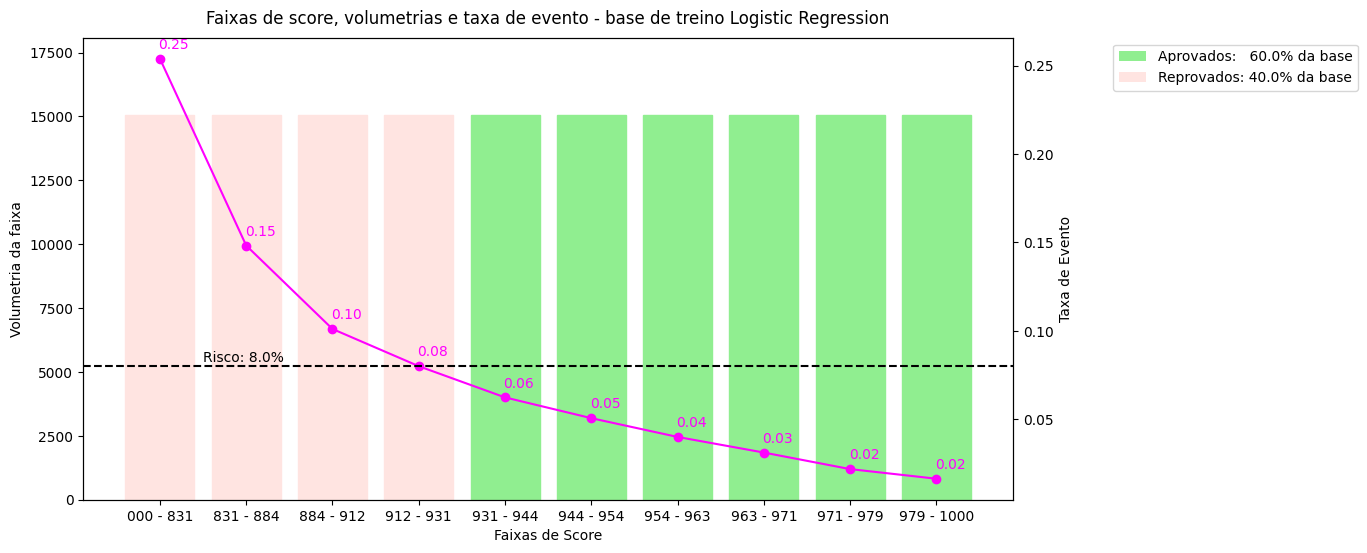

In [ ]:
# Análise da carteira dos dados de treino - Apetite de risco de 8,0%.
faixas_treino_8 = carteira_treino_rl(model = model, name_model = 'Logistic Regression', risk = 0.08, X_train = X_train, y_train = y_train, prob_train = y_prob_train)

**Gráfico de Treino - Apetite de risco de 5,0%**

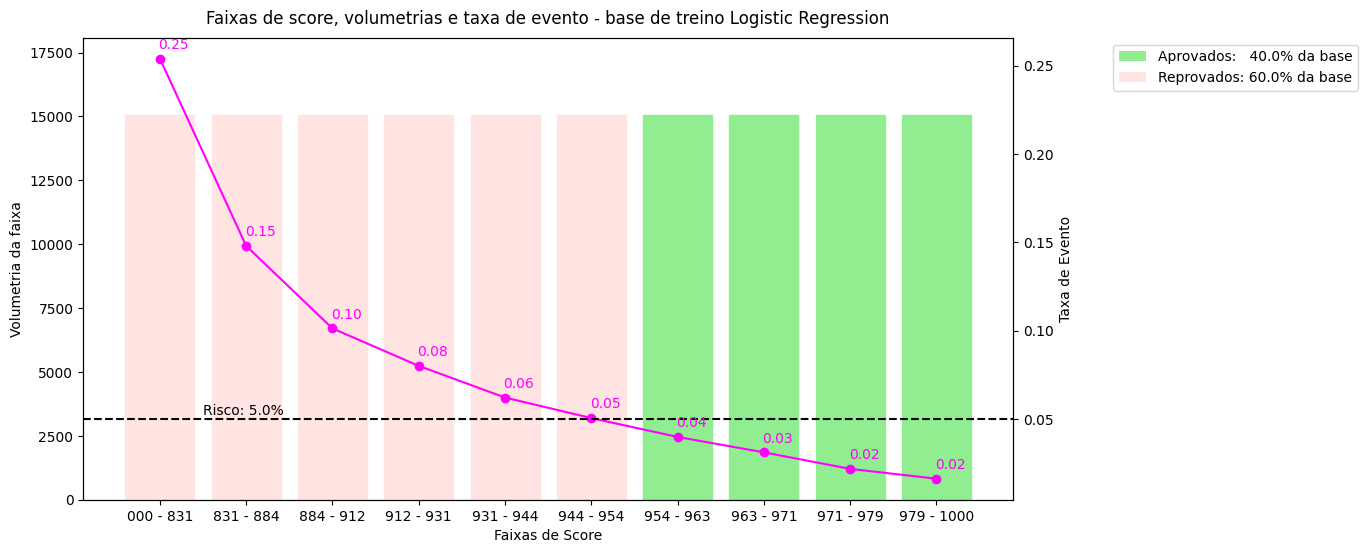

In [ ]:
# Análise da carteira dos dados de treino - Apetite de risco de 5,0%.
faixas_treino_5 = carteira_treino_rl(model = model, name_model = 'Logistic Regression', risk = 0.05, X_train = X_train, y_train = y_train, prob_train = y_prob_train)

**Gráfico de Treino - Apetite de risco de 12,0%**

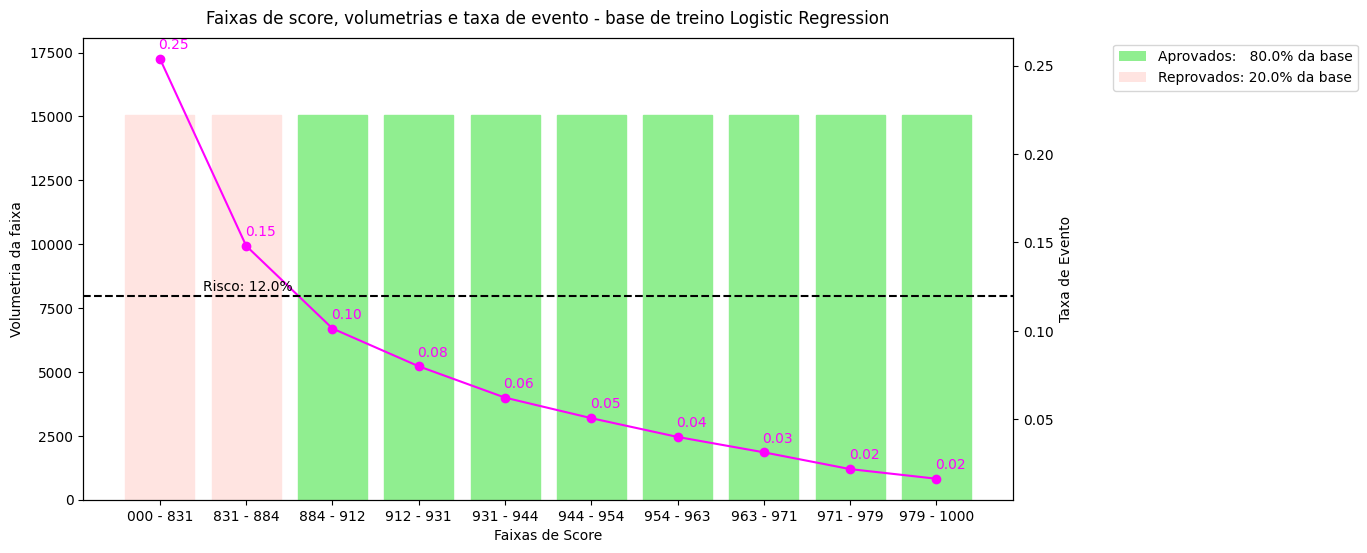

In [ ]:
# Análise da carteira dos dados de treino - Apetite de risco de 12,0%.
faixas_treino_12 = carteira_treino_rl(model = model, name_model = 'Logistic Regression', risk = 0.12, X_train = X_train, y_train = y_train, prob_train = y_prob_train)

**Gráfico de Teste - Apetite de risco de 8,0%**

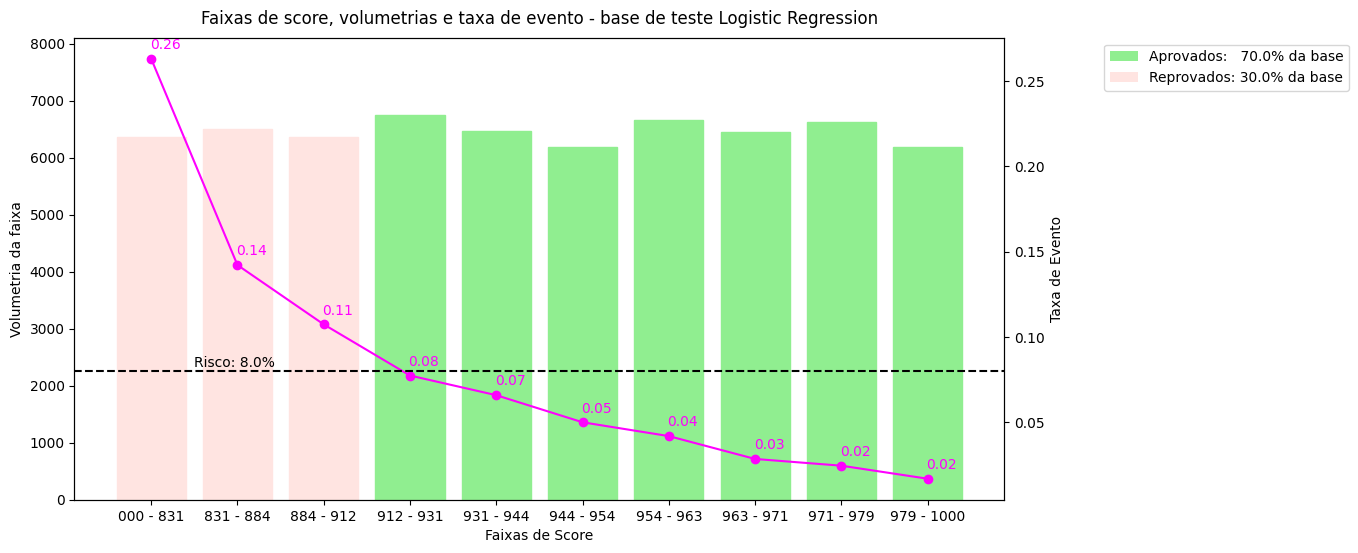

In [ ]:
# Análise da carteira dos dados de teste - Apetite de risco de 8,0%.
faixas_teste_8 = carteira_teste_rl(faixas = faixas_treino_8, model = model, name_model = 'Logistic Regression', risk=0.08, X_test = X_test, y_test = y_test, prob_test = y_prob_test)

**Gráfico de Teste - Apetite de risco de 5,0%**

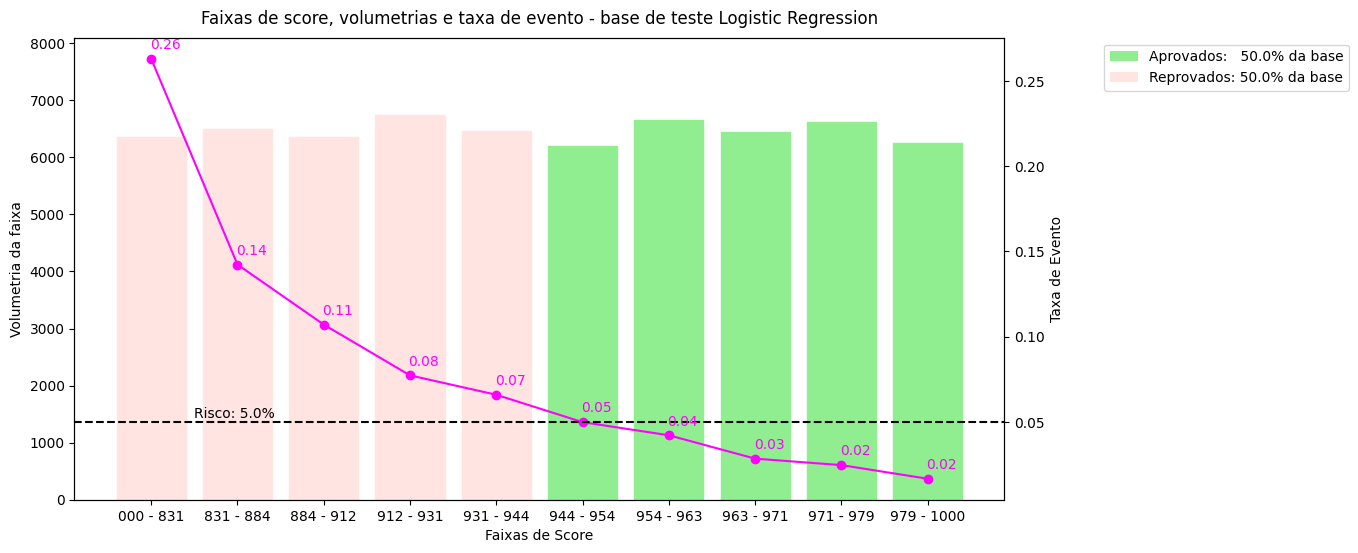

In [ ]:
# Análise da carteira dos dados de teste - Apetite de risco de 8,0%.
faixas_teste_5 = carteira_teste_rl(faixas = faixas_treino_5, model = model, name_model = 'Logistic Regression', risk=0.05, X_test = X_test, y_test = y_test, prob_test = y_prob_test)

**Gráfico de Teste - Apetite de risco de 12,0%**

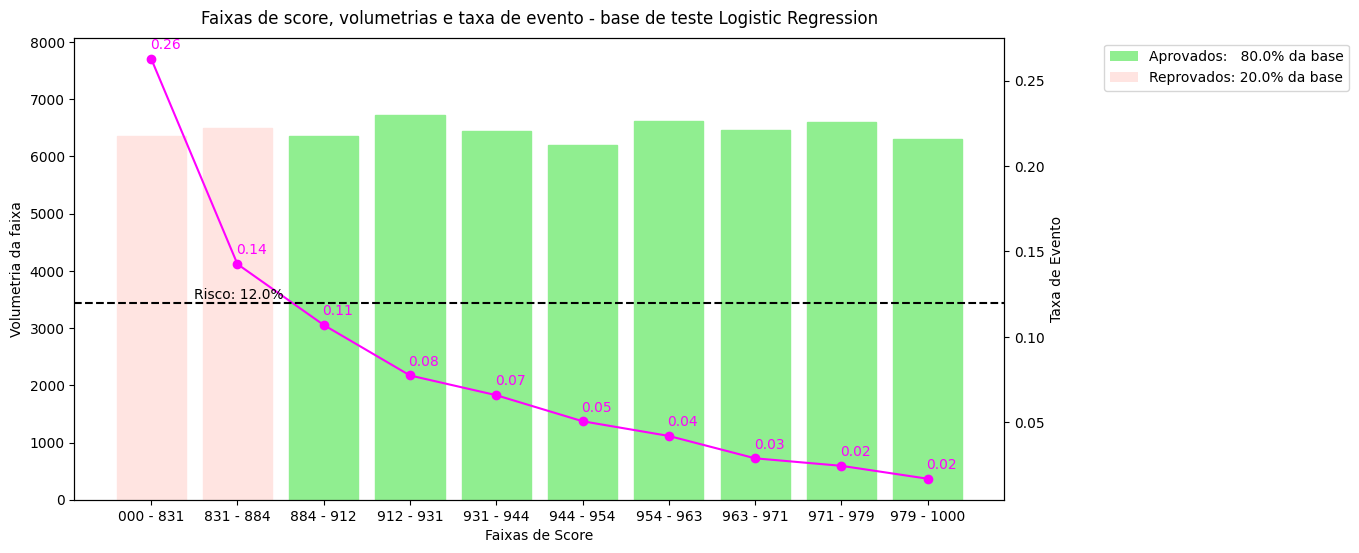

In [ ]:
# Análise da carteira dos dados de teste - Apetite de risco de 12,0%.
faixas_teste_12 = carteira_teste_rl(faixas = faixas_treino_12, model = model, name_model = 'Logistic Regression', risk=0.12, X_test = X_test, y_test = y_test, prob_test = y_prob_test)